# Star Wars: Best Episode

## Introduction

Star Wars is one of the most known franchises of the history. The line "_I'm your father!_" said by Darth Vader echoes throughout everyone's ears. But of all six episodes, which one is the best? To answer this question, the team at [FiveThirtyEight](https://fivethirtyeight.com/) surveyed American _Star Wars_ fans and received a total of 835 responses. The data is available on their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). 

The episodes of the franchise are;


* **"The Phantom Menace"**      - Episode 1
* **"Attack of the Clones"**    - Episode 2
* **"Revenge of the Sith"**     - Episode 3
* **"A New Hope"**              - Episode 4
* **"The Empire Strikes Back"** - Episode 5
* **"Return of the Jedi"**      - Episode 6


In this current project, the survey data collected by the team will be used to achieve the current aims;

* To determine the most watched episode of the franchise
* To ascertain the highest-ranked episode

## Imports and parameters

In [1]:
# Python version
#!pip install -q -U watermark
from platform import python_version
print('Python version used in this jupyter notebook:', python_version())

Python version used in this jupyter notebook: 3.9.12


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
# Graphic parameters
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
# Package versions
%reload_ext watermark
%watermark -a "Rafael Cavaletti Maia" --iversions

Author: Rafael Cavaletti Maia

seaborn   : 0.11.2
pandas    : 1.4.2
numpy     : 1.21.5
matplotlib: 3.5.1



## Defining useful functions

In [5]:
def check_columns(df, idx1, idx2 = None):
    """
    It shows the frequency column name and the number of times each element is present 
    df : the DataFrame used to check
    idx1, idx2 : indexes of the columns
    """
    for i in df.columns[idx1:idx2]:
        print(f'Column: {i}')
        print('')
        print(f'Value counts:\n{df[i].value_counts(dropna = False)}')
        print('')
        print(100*'*')
        print('')

In [6]:
def film_true_false(value):
    """
    Returns False if the element is null, otherwise returns True
    """
    if pd.isnull(value):
        return False
    
    else:
        return True

In [7]:
def countplot_columns(df, cols, r, c, idx1, idx2, hue = None):
    
    """
    Multiple countplots at the same time
    df : the DataFrame used
    cols : columns to plot
    r : number of the rows in the plot area
    c : number of the columns in plot area
    idx1, idx2 : indexes of each plotted graphic
    hue : hue in case of specific element
    """
    
    plt.figure(figsize = (20,10))
    for i in range(0, len(cols[idx1:idx2])):
        plt.subplot(r, c, i+1)
        sns.countplot(x = df[cols[idx1:idx2][i]], color = 'green', orient = 'v', hue = hue)
        plt.title(f'Count of {cols[idx1:idx2][i]}', fontsize = 20)
        plt.xlabel(cols[idx1:idx2][i], fontsize = 15)
        plt.ylabel('Counts', fontsize = 15)
        plt.xticks(rotation = 30, ha = 'right')
        plt.tight_layout()

In [8]:
def plot_bars(bar1, bar2, labels, legend1, legend2, title, titley):
    """
    Bar plot of two bars in the same graphic
    bar1, bar2 : bars to be plotted
    labels : labels of the x variables
    legend1, legend2 : what each bar represents
    title : graphic title
    titley : title of the y axis
    """

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, bar1, width, label= legend1)
    rects2 = ax.bar(x + width/2, bar2, width, label= legend2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xticks(x, labels)
    ax.legend()
    ax.set_ylabel(titley, fontsize = 15)
    ax.set_title(title, fontsize = 20)
    ax.bar_label(rects1, padding=3, fontsize = 15)
    ax.bar_label(rects2, padding=3, fontsize = 15)

    fig.tight_layout()

    plt.show()

## Charging the data and checking previous information

In [9]:
# Charging the data
df_original = pd.read_csv('dados/StarWars.csv', encoding = "ISO-8859-1")

In [10]:
# Checking the shape of the DataFrame
df_original.shape

(1187, 38)

In [11]:
# Visualizing the DataFrame
df_original.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [12]:
# Checking the columns names
df_original.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [13]:
# Checking the types of the columns
df_original.dtypes

RespondentID                                                                                                                                     float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                      object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                             object
Which of the following Star Wars films have you seen? Please select all that apply.                                                               object
Unnamed: 4                                                                                                                                        object
Unnamed: 5                                                                                                                                        object
Unnamed: 6                                                                        

# Exploration

## General information of the columns
Let's check what we have in our dataframe and try to collect some information that may be useful.

In [14]:
# Head of the dataframe for reference
df_original.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [15]:
# First column (ID) is not necessary. We'll skip it
check_columns(df_original, 1)

Column: Have you seen any of the 6 films in the Star Wars franchise?

Value counts:
Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

****************************************************************************************************

Column: Do you consider yourself to be a fan of the Star Wars film franchise?

Value counts:
Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

****************************************************************************************************

Column: Which of the following Star Wars films have you seen? Please select all that apply.

Value counts:
Star Wars: Episode I  The Phantom Menace    674
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

**************************

### Observations

The observation above reveals that our dataframe contains several columns with ambiguous names. Also, we can see that there are many NaN values present in the dataframe that need to be cleaned. 

Another information we could extract is that the first row corresponds to the main subject of the respective column, therefore it's easier to deal with the ambiguous column name problem. There is a summary below with the ambiguous columns and their respective subject.

* **"Which of the following Star Wars films have you seen? Please select all that apply."**      - Star Wars: Episode I The Phantom Menace
* **"Unnamed: 4"**    - Star Wars: Episode II Attack of the Clones
* **"Unnamed: 5"**    - Star Wars: Episode III Revenge of the Sith	
* **"Unnamed: 6"**    - Star Wars: Episode IV A New Hope
* **"Unnamed: 7"**    - Star Wars: Episode V The Empire Strikes Back
* **"Unnamed: 8"**    - Star Wars: Episode VI Return of the Jedi
<br>
<br>
* **"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film."**      - Star Wars: Episode I The Phantom Menace
* **"Unnamed: 10"**    - Star Wars: Episode II Attack of the Clones
* **"Unnamed: 11"**    - Star Wars: Episode III Revenge of the Sith	
* **"Unnamed: 12"**    - Star Wars: Episode IV A New Hope
* **"Unnamed: 13"**    - Star Wars: Episode V The Empire Strikes Back
* **"Unnamed: 14"**    - Star Wars: Episode VI Return of the Jedi
<br>
<br>
* **"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."**      - Han Solo
* **"Unnamed: 16"**    - Luke Skywalker
* **"Unnamed: 17"**    - Princess Leia Organa
* **"Unnamed: 18"**    - Anakin Skywalker
* **"Unnamed: 19"**    - Obi Wan Kenobi
* **"Unnamed: 20"**    - Emperor Palpatine
* **"Unnamed: 21"**    - Darth Vader
* **"Unnamed: 22"**    - Lando Calrissian
* **"Unnamed: 23"**    - Boba Fett
* **"Unnamed: 24"**    - C-3P0
* **"Unnamed: 25"**    - R2 D2
* **"Unnamed: 26"**    - Jar Jar Binks
* **"Unnamed: 27"**    - Padme Amidala
* **"Unnamed: 28"**    - Yoda

# Data Cleaning

## Renaming columns
First, we'll rename the columns to obtain more intuitive names and then drop the first row since it won't be necessary anymore.

In [16]:
# Columns 1 and 2 : Seen any film - Consider star wars fan
columns_names_12 = {'Have you seen any of the 6 films in the Star Wars franchise?' : 'seen_any_film',
                'Do you consider yourself to be a fan of the Star Wars film franchise?' : 'consider_starwars_fan'}

df_original.rename(columns = columns_names_12, inplace = True)

In [17]:
# Columns 3 to 8: Films seen
columns_names_38 = df_original.columns[3:9]
episode = 0

for col in columns_names_38:
    episode+= 1
    df_original.rename(columns = {col : f'seen_episode_{episode}'}, inplace = True)

In [18]:
# Columns 9 to 14: Ranks
columns_names_9_14 = df_original.columns[9:15]
episode = 0

for col in columns_names_9_14:
    episode+= 1
    df_original.rename(columns = {col : f'rank_episode_{episode}'}, inplace = True)

In [19]:
# Columns 15 to 28: Characters popularity
columns_names_15_28 = df_original.columns[15:29]

for col in columns_names_15_28:
    char = df_original[col][0].lower().replace(' ', '_')
    df_original.rename(columns = {col : f'popularity_{char}'}, inplace = True)

In [20]:
# Columns 29 to 37: Which character shot first, Expanded Universe, Star Trek and socioeconomics
columns_29_37 = {df_original.columns[29] : 'shot_first',
                df_original.columns[30] : 'familiar_expanded_universe',
                df_original.columns[31] : 'consider_fan_expanded_universe',
                df_original.columns[32] : 'consider_fan_star_trek',
                df_original.columns[33] : 'gender',
                df_original.columns[34] : 'age',
                df_original.columns[35] : 'household_income',
                df_original.columns[36] : 'education',
                df_original.columns[37] : 'location'}

df_original.rename(columns = columns_29_37, inplace = True)

In [21]:
# Removing the first row
df_original.drop(0, inplace = True)

In [22]:
# Checking the dataframe
df_original.head(3)

,RespondentID,seen_any_film,consider_starwars_fan,seen_episode_1,seen_episode_2,seen_episode_3,seen_episode_4,seen_episode_5,seen_episode_6,rank_episode_1,rank_episode_2,rank_episode_3,rank_episode_4,rank_episode_5,rank_episode_6,popularity_han_solo,popularity_luke_skywalker,popularity_princess_leia_organa,popularity_anakin_skywalker,popularity_obi_wan_kenobi,popularity_emperor_palpatine,popularity_darth_vader,popularity_lando_calrissian,popularity_boba_fett,popularity_c-3p0,popularity_r2_d2,popularity_jar_jar_binks,popularity_padme_amidala,popularity_yoda,shot_first,familiar_expanded_universe,consider_fan_expanded_universe,consider_fan_star_trek,gender,age,household_income,education,location
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


### Observations
Now we don't have ambiguous columns anymore. We can proceed to the next step, which is replacing Yes/No values for True/False

## Replacing Yes/No values
We have several Yes/No values. For a better analysis, we should replace them for True/False (boolean) values. We can do that easily using the map function.

In [23]:
# Selecting the columns with Yes/No values
columns_yes_no = df_original.loc[: , df_original.isin(['Yes', 'No']).any()].columns

# Checking
columns_yes_no

Index(['seen_any_film', 'consider_starwars_fan', 'familiar_expanded_universe',
       'consider_fan_expanded_universe', 'consider_fan_star_trek'],
      dtype='object')

In [24]:
# Convertion variable
convert_yes_no = {'Yes' : True, 'No' : False}

# Applying the convertion
for col in columns_yes_no:
    df_original[col] = df_original[col].map(convert_yes_no)

In [25]:
# Checking
df_original[columns_yes_no].head()

,seen_any_film,consider_starwars_fan,familiar_expanded_universe,consider_fan_expanded_universe,consider_fan_star_trek
1,True,True,True,False,False
2,False,NaN,NaN,NaN,True
3,True,False,False,NaN,False
4,True,True,False,NaN,True
5,True,True,True,False,False


## Applying boolean for films seen
The columns about whether a film was seen or not contain the respective film name. Let's change it so that if the film has been seen it will receive the value True, and if it hasn't it will receive the value False.

In [26]:
# Applying the film_true_false function
df_original.loc[:,'seen_episode_1':'seen_episode_6'] = df_original.loc[:,'seen_episode_1':'seen_episode_6'].applymap(film_true_false)

# Checking the Dataframe
df_original.head()

,RespondentID,seen_any_film,consider_starwars_fan,seen_episode_1,seen_episode_2,seen_episode_3,seen_episode_4,seen_episode_5,seen_episode_6,rank_episode_1,rank_episode_2,rank_episode_3,rank_episode_4,rank_episode_5,rank_episode_6,popularity_han_solo,popularity_luke_skywalker,popularity_princess_leia_organa,popularity_anakin_skywalker,popularity_obi_wan_kenobi,popularity_emperor_palpatine,popularity_darth_vader,popularity_lando_calrissian,popularity_boba_fett,popularity_c-3p0,popularity_r2_d2,popularity_jar_jar_binks,popularity_padme_amidala,popularity_yoda,shot_first,familiar_expanded_universe,consider_fan_expanded_universe,consider_fan_star_trek,gender,age,household_income,education,location
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Observations
We cleaned the data until de columns about whether a film has been seen or not. This procedure was done replacing 'Yes' or film name by the value True, and replacing the NaN values by the value False.
<br>
There are several more NaN values in different contexts in our dataframe. Let's deal with them.

## Dealing with NaN values
NaN values are a problem and need to be dealt with. For this, we will split our original dataframe in two new dataframes:

* Dataframe 1: will have those who have seen at least 1 film
* Dataframe 2: will have those who haven't seen any film

The reason for this is that these groups are distinct, so it's already expected for those of the second group to have more NaN values since they haven't seen any film. 

In [27]:
# Checking if there's any NaN value in the seen_any_film column
df_original['seen_any_film'].isna().sum()

0

In [28]:
# Splitting the original dataframe
df_seen_true = df_original[df_original['seen_any_film'] == True].reset_index(drop = True)
df_seen_false = df_original[df_original['seen_any_film'] == False].reset_index(drop = True)

### Checking for inconsistencies
<br>
The DataFrames we created are supposed to have records of people who have watched at least one of the films, and people who haven't watched any.
<br>
<br>
Having the variable 'seen_any_film' as True, but all the variables 'seen_episodeX' as False for the same ID is considered an inconsistency.
<br>
<br>
Also, If we have the variable 'seen_any_film' as False, but any of the variables 'seen_episodeX' as True for the same ID it's considered an inconsistency as well.
<br>
<br>
Let's check these possibilities

**seen_any_film as True**

In [29]:
# Obtaining the transpose DataFrame
df_transpose_true = df_seen_true.T
df_transpose_true.head(10)

0             1             2             3    \
RespondentID           3292879998.0  3292765271.0  3292763116.0  3292731220.0   
seen_any_film                  True          True          True          True   
consider_starwars_fan          True         False          True          True   
seen_episode_1                 True          True          True          True   
seen_episode_2                 True          True          True          True   
seen_episode_3                 True          True          True          True   
seen_episode_4                 True         False          True          True   
seen_episode_5                 True         False          True          True   
seen_episode_6                 True         False          True          True   
rank_episode_1                    3             1             5             5   

                                4             5             6             7    \
RespondentID           3292719380.0  3292684787.0  3292663732.0  3292654043.0   
seen_any_film                  True          True          True          True   
consider_starwars_fan          True          True          True          True   
seen_episode_1                 True          True          True          True   
seen_episode_2                 True          True          True          True   
seen_episode_3                 True          True          True          True   
seen_episode_4                 True          True          True          True   
seen_episode_5                 True          True          True          True   
seen_episode_6                 True          True          True          True   
rank_episode_1                    1             6             4             5   

                                8             9             10            11   \
RespondentID           3292640424.0  3292637870.0  3292609214.0  3292596911.0   
seen_any_film                  True          True          True          True   
consider_starwars_fan         False           NaN         False          True   
seen_episode_1                False         False          True          True   
seen_episode_2                 True         False          True          True   
seen_episode_3                False         False          True          True   
seen_episode_4                False         False          True          True   
seen_episode_5                False         False          True          True   
seen_episode_6                False         False          True          True   
rank_episode_1                    1           NaN             3             4   

                                12            13            14            15   \
RespondentID           3292587240.0  3292583038.0  3292580516.0  3292572872.0   
seen_any_film                  True          True          True          True   
consider_starwars_fan          True          True          True          True   
seen_episode_1                 True          True         False          True   
seen_episode_2                 True          True         False          True   
seen_episode_3                 True          True         False          True   
seen_episode_4                 True          True          True         False   
seen_episode_5                 True          True         False         False   
seen_episode_6                 True          True         False          True   
rank_episode_1                    4             4             4             1   

                                16            17            18            19   \
RespondentID           3292565282.0  3292562297.0  3292522349.0  3292521066.0   
seen_any_film                  True          True          True          True   
consider_starwars_fan          True          True          True         False   
seen_episode_1                 True          True          True          True   
seen_episode_2                 True          True          

Now each column represents one ID. Let's check if there's is a column where the sum of the values from 'seen_episode1' to 'seen_episode6' equals zero. If this happens, we have an inconsistency.

In [30]:
# Obtaining the columns where we have inconsistencies
list_inconsistencies_true = [i for i in df_transpose_true[3:9].columns if df_transpose_true[3:9][i].sum() == 0]

# Checking the list
print('These are the possible inconsistencies:\n', list_inconsistencies_true)
print(f'\nIt has been found {len(list_inconsistencies_true)} possible inconsistencies')

These are the possible inconsistencies:
 [9, 73, 84, 91, 107, 108, 119, 151, 158, 162, 170, 172, 179, 186, 197, 205, 207, 219, 223, 228, 247, 256, 261, 263, 276, 289, 290, 303, 309, 310, 315, 318, 325, 328, 334, 336, 339, 343, 346, 352, 367, 370, 374, 389, 399, 404, 408, 412, 423, 425, 426, 437, 449, 452, 454, 474, 478, 480, 484, 503, 504, 505, 506, 511, 528, 530, 531, 562, 590, 607, 616, 636, 657, 661, 662, 663, 664, 677, 679, 697, 703, 712, 724, 747, 753, 775, 793, 804, 808, 817, 825, 831, 842, 843, 853, 857, 859, 877, 898, 900, 902]

It has been found 101 possible inconsistencies


In [31]:
# Checking the result
df_inconsistencies_true = df_transpose_true[list_inconsistencies_true]
df_inconsistencies_true

,9,73,84,91,107,108,119,151,158,162,170,172,179,186,197,205,207,219,223,228,247,256,261,263,276,289,290,303,309,310,315,318,325,328,334,336,339,343,346,352,367,370,374,389,399,404,408,412,423,425,426,437,449,452,454,474,478,480,484,503,504,505,506,511,528,530,531,562,590,607,616,636,657,661,662,663,664,677,679,697,703,712,724,747,753,775,793,804,808,817,825,831,842,843,853,857,859,877,898,900,902
RespondentID,3292637870.0,3291669388.0,3291570206.0,3291469991.0,3291420030.0,3291405943.0,3291341186.0,3291037640.0,3291022013.0,3291006540.0,3290980789.0,3290976539.0,3290949606.0,3290939696.0,3290912485.0,3290896982.0,3290888715.0,3290862050.0,3290858689.0,3290853267.0,3290804128.0,3290781284.0,3290777129.0,3290767951.0,3290744027.0,3290719847.0,3290718359.0,3290701442.0,3290695316.0,3290693095.0,3290685885.0,3290681574.0,3290664069.0,3290661587.0,3290651085.0,3290644326.0,3290634681.0,3290628419.0,3290625814.0,3290602490.0,3290565487.0,3290553558.0,3290544012.0,3290499953.0,3290461455.0,3290432874.0,3290426289.0,3290412412.0,3290380140.0,3290371532.0,3290371101.0,3290335343.0,3290304610.0,3290294142.0,3290289176.0,3290193368.0,3290176915.0,3290174048.0,3290164098.0,3290097268.0,3290095220.0,3290083352.0,3290081504.0,3290062936.0,3290019779.0,3290017901.0,3290013239.0,3289919285.0,3289862004.0,3289805753.0,3289795859.0,3289706550.0,3289625905.0,3289618768.0,3289618355.0,3289616064.0,3289610618.0,3289561190.0,3289553574.0,3289510083.0,3289492759.0,3289459695.0,3289418012.0,3289281855.0,3289178815.0,3288723253.0,3288682774.0,3288665355.0,3288653945.0,3288638640.0,3288617343.0,3288608965.0,3288583591.0,3288581774.0,3288559700.0,3288553457.0,3288551156.0,3288512020.0,3288460192.0,3288458873.0,3288455900.0
seen_any_film,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
consider_starwars_fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seen_episode_1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
seen_episode_2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
seen_episode_3,False,False,False,False,False,False,False,False,False,False,False,Fals

It looks like all these columns are filled with 'nan' or 'False' values (excluding the ID and seen film information). Let's validate that.

In [32]:
# Checking if there's any column filled

for i in df_inconsistencies_true.columns:
    try:
        if df_inconsistencies_true[i][2:].sum() != 0:
            print(f'Not empty in column {i}')
        
        else:
            pass
        
    except: # There's a possibility of string values, which returns a TypeError
        print(f'Error in column {i}')

print()
print(f'The last column checked was column {i}') # To check if the code above broke along the way

Error in column 423

The last column checked was column 902


In [33]:
# Checking the column where we found an error
df_inconsistencies_true[[423]]

,423
RespondentID,3290380140.0
seen_any_film,True
consider_starwars_fan,False
seen_episode_1,False
seen_episode_2,False
seen_episode_3,False
seen_episode_4,False
seen_episode_5,False
seen_episode_6,False
rank_episode_1,2


The person in column 423 haven't watched any film despite marking True for 'seen_any_film' and ranking them. Also, he is unfamiliar with most of the characters. We can consider it an inconsistency.
<br>
Since most of the inconsistencies we found are filled with NaN and False values, we can remove them from our dataframe without losing much information in our analysis.


In [34]:
# Removing the inconsistent columns
df_transpose_true = df_transpose_true.drop(list_inconsistencies_true, axis = 1)
df_transpose_true.head()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,85,86,87,88,89,90,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,109,110,111,112,113,114,115,116,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,159,160,161,163,164,165,166,167,168,169,171,173,174,175,176,177,178,180,181,182,183,184,185,187,188,189,190,191,192,193,194,195,196,198,199,200,201,202,203,204,206,208,209,210,211,212,213,214,215,216,217,218,220,221,222,224,225,226,227,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,248,249,250,251,252,253,254,255,257,258,259,260,262,264,265,266,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,284,285,286,287,288,291,292,293,294,295,296,297,298,299,300,301,302,304,305,306,307,308,311,312,313,314,316,317,319,320,321,322,323,324,326,327,329,330,331,332,333,335,337,338,340,341,342,344,345,347,348,349,350,351,353,354,355,356,357,358,359,360,361,362,363,364,365,366,368,369,371,372,373,375,376,377,378,379,380,381,382,383,384,385,386,387,388,390,391,392,393,394,395,396,397,398,400,401,402,403,405,406,407,409,410,411,413,414,415,416,417,418,419,420,421,422,424,427,428,429,430,431,432,433,434,435,436,438,439,440,441,442,443,444,445,446,447,448,450,451,453,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,475,476,477,479,481,482,483,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,507,508,509,510,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,529,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,608,609,610,611,612,613,614,615,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,658,659,660,665,666,667,668,669,670,671,672,673,674,675,676,678,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,698,699,700,701,702,704,705,706,707,708,709,710,711,713,714,715,716,717,718,719,720,721,722,723,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,748,749,750,751,752,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,794,795,796,797,798,799,800,801,802,803,805,806,807,809,810,811,812,813,814,815,816,818,819,820,821,822,823,824,826,827,828,829,830,832,833,834,835,836,837,838,839,840,841,844,845,846,847,848,849,850,851,852,854,855,856,858,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,899,901,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935
RespondentID,3292879998.0,3292765271.0,3292763116.0,3292731220.0,3292719380.0,3292684787.0,3292663732.0,3292654043.0,3292640424.0,3292609214.0,3292596911.0,3292587240.0,3292583038.0,3292580516.0,3292572872.0,3292565282.0,3292562297.0,3292522349.0,3292521066.0,3292511801.0,3292483200.0,3292465491.0,3292420123.0,3292384040.0,3292380493.0,3292376985.0,3292366792.0,3292339379.0,3292330840.0,3292318652.0,3292290677.0,3292281095.0,3292279889.0,3292264069.0,3292257520.0,3292249492.0,3292222729.0,3292221635.0,3292218251.0,3292214307.0,3292210606.0,3292189580.0,3292187343.0,3292178389.0,3292176862.0,3292173922.0,3292167131.0,3292162057.0,3292156614.0,3292148570.0,3292144665.0,3292143503.0,3292131636.0,3292125068.0,3292120160.0,3292103680.0,3292050153.0,3292041365

In [35]:
# Transposing again to get our DataFrame back
df_seen_true = df_transpose_true.T.reset_index(drop = True)

# Check if everything is ok
df_seen_true.head(3)

,RespondentID,seen_any_film,consider_starwars_fan,seen_episode_1,seen_episode_2,seen_episode_3,seen_episode_4,seen_episode_5,seen_episode_6,rank_episode_1,rank_episode_2,rank_episode_3,rank_episode_4,rank_episode_5,rank_episode_6,popularity_han_solo,popularity_luke_skywalker,popularity_princess_leia_organa,popularity_anakin_skywalker,popularity_obi_wan_kenobi,popularity_emperor_palpatine,popularity_darth_vader,popularity_lando_calrissian,popularity_boba_fett,popularity_c-3p0,popularity_r2_d2,popularity_jar_jar_binks,popularity_padme_amidala,popularity_yoda,shot_first,familiar_expanded_universe,consider_fan_expanded_universe,consider_fan_star_trek,gender,age,household_income,education,location
0,3292879998.0,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292765271.0,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
2,3292763116.0,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


**seen_any_film as False**
<br>
Similar to the procedure above

In [36]:
# Obtaining the transpose DataFrame
df_transpose_false = df_seen_false.T
df_transpose_false

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
RespondentID,3292879538.0,3292635062.0,3292447974.0,3292297848.0,3292202220.0,3292186608.0,3292161407.0,3291653882.0,3291649780.0,3291648660.0,3291635934.0,3291603688.0,3291476650.0,3291470613.0,3291435056.0,3291430239.0,3291430193.0,3291427761.0,3291424006.0,3291421381.0,3291410155.0,3291402264.0,3291391717.0,3291391033.0,3291390734.0,3291388906.0,3291290675.0,3291203531.0,3291064417.0,3291033668.0,3291029281.0,3291022275.0,3291018581.0,3291015347.0,3291009055.0,3291001879.0,3290998457.0,3290992371.0,3290973177.0,3290973120.0,3290965482.0,3290961855.0,3290953060.0,3290946211.0,3290927126.0,3290926407.0,3290893301.0,3290874545.0,3290869696.0,3290852271.0,3290844577.0,3290840905.0,3290828902.0,3290824340.0,3290815080.0,3290807769.0,3290798641.0,3290782952.0,3290769012.0,3290765210.0,3290761823.0,3290738262.0,3290737104.0,3290717372.0,3290714430.0,3290711898.0,3290711757.0,3290707402.0,3290694269.0,3290692020.0,3290686887.0,3290686362.0,3290674534.0,3290652558.0,3290626609.0,3290601518.0,3290555153.0,3290547819.0,3290544886.0,3290536294.0,3290526356.0,3290475079.0,3290463350.0,3290432121.0,3290398978.0,3290371734.0,3290359700.0,3290358751.0,3290329580.0,3290310304.0,3290297761.0,3290294922.0,3290287101.0,3290280642.0,3290268027.0,3290249464.0,3290248279.0,3290248167.0,3290225128.0,3290184813.0,3290182531.0,3290180442.0,3290174629.0,3290159455.0,3290159056.0,3290128978.0,3290127670.0,3290116629.0,3290094384.0,3290082468.0,3290081040.0,3290076587.0,3290071379.0,3290050695.0,3290049932.0,3290047689.0,3290014606.0,3290008538.0,3289991708.0,3289989311.0,3289987865.0,3289972382.0,3289971452.0,3289962839.0,3289956408.0,3289942520.0,3289905819.0,3289903380.0,3289894873.0,3289891069.0,3289890495.0,3289888113.0,3289866259.0,3289856557.0,3289848909.0,3289837359.0,3289834572.0,3289831274.0,3289830199.0,3289809255.0,3289808310.0,3289805745.0,3289797876.0,3289790475.0,3289779434.0,3289764515.0,3289753279.0,3289745316.0,3289713384.0,3289710382.0,3289689591.0,3289686202.0,3289685200.0,3289666523.0,3289653664.0,3289649402.0,3289648154.0,3289646833.0,3289640516.0,3289627503.0,3289625918.0,3289618781.0,3289597768.0,3289569955.0,3289563102.0,3289555540.0,3289530269.0,3289528214.0,3289512650.0,3289494245.0,3289485680.0,3289481873.0,3289469330.0,3289463626.0,3289437997.0,3289419064.0,3289415200.0,3289374653.0,3289341349.0,3289334585.0,3289334511.0,3289316592.0,3289305272.0,3289302743.0,3289301976.0,3289282741.0,3289279767.0,3289274207.0,3289242777.0,3289179421.0,3289172932.0,3289032654.0,3288826742.0,3288823234.0,3288699973.0,3288698545.0,3288696158.0,3288694272.0,3288689621.0,3288683262.0,3288672197.0,3288668404.0,3288666429.0,3288665797.0,3288662617.0,3288653332.0,3288649171.0,3288641278.0,3288639879.0,3288639732.0,3288633861.0,3288627180.0,3288623420.0,3288613051.0,3288601827.0,3288593331.0,3288590836.0,3288588424.0,3288580684.0,3288580145.0,3288579719.0,3288579445.0,3288563970.0,3288563342.0,3288557322.0,3288549677.0,3288539645.0,3288532773.0,3288532255.0,3288526244.0,3288513045.0,3288511686.0,3288505216.0,3288505151.0,3288499757.0,3288497532.0,3288497010.0,3288479074.0,32

In [37]:
# Obtaining the columns where we have inconsistencies (now sum != 0)
list_inconsistencies_false = [i for i in df_transpose_false[3:9].columns if df_transpose_false[3:9][i].sum() != 0]

# Checking the list
print(list_inconsistencies_false)

[]


The list was empty as expected. No inconsistencies in this DataFrame.

### NaN values - dataframe of those who have seen at least one film
<br>
Let's deal with the NaN values in the dataframe of the people who have seen at least one film. We'll see how much the NaN values represent of the total values in each column and consider the best strategy to work with them.

In [38]:
# Information about missing values
for i in df_seen_true.columns:
    if df_seen_true[i].isna().sum() != 0:
        print(f'Column: {i}')
        print(f'Number of Missing Values: {df_seen_true[i].isna().sum()}')
        print(f'% of the Data: {round(df_seen_true[i].isna().sum()*100/df_seen_true.shape[0], 2)}')
        print(40*'-')
    else:
        pass

Column: rank_episode_1
Number of Missing Values: 1
% of the Data: 0.12
----------------------------------------
Column: rank_episode_3
Number of Missing Values: 1
% of the Data: 0.12
----------------------------------------
Column: popularity_han_solo
Number of Missing Values: 7
% of the Data: 0.84
----------------------------------------
Column: popularity_luke_skywalker
Number of Missing Values: 5
% of the Data: 0.6
----------------------------------------
Column: popularity_princess_leia_organa
Number of Missing Values: 5
% of the Data: 0.6
----------------------------------------
Column: popularity_anakin_skywalker
Number of Missing Values: 13
% of the Data: 1.56
----------------------------------------
Column: popularity_obi_wan_kenobi
Number of Missing Values: 11
% of the Data: 1.32
----------------------------------------
Column: popularity_emperor_palpatine
Number of Missing Values: 22
% of the Data: 2.63
----------------------------------------
Column: popularity_darth_vader
N

Most of the missing values above represent less than 3.0% of the data in each column. The exception if for the consider_fan_expanded_universe column and 'household_income'.
Let's take a closer look at the expandes universe columns.

In [39]:
# Expanded universe
df_seen_true[['familiar_expanded_universe','consider_fan_expanded_universe']]

,familiar_expanded_universe,consider_fan_expanded_universe
0,True,False
1,False,NaN
2,False,NaN
3,True,False
4,True,False
...,...,...
830,False,NaN
831,False,NaN
832,False,NaN
833,False,NaN


At first glance, it looks like that those who aren't familiar with the expanded universe didn't fill whether they are a fan of the expanded universe or not. Let's check that.

In [40]:
# Percentage of those who aren't familiar with the expanded universe
percentage_unfamiliar = len(df_seen_true[df_seen_true['familiar_expanded_universe'] == False])*100/df_seen_true.shape[0]

# Percentage of missing values in consider_fan_expanded_universe
percentage_missing = df_seen_true['consider_fan_expanded_universe'].isna().sum()/df_seen_true.shape[0]*100

print('Percentage of those who are unfamiliar with the expanded universe:')
print(percentage_unfamiliar)
print()
print('Percentage of the missing values of the column consider_fan_expanded_universe:')
print(percentage_missing)

Percentage of those who are unfamiliar with the expanded universe:
73.53293413173652

Percentage of the missing values of the column consider_fan_expanded_universe:
74.49101796407186


The percentage of those who aren't familiar with the expanded universe ir very close to the percentage of the missing values of those who didn't answer whether they are or they aren't a fan of the expanded universe. We can consider that the missing values aren't fans of the expanded universe
* Strategy: 
    * We'll replace the NaN values for the most frequent value (mode) of the respective column
    * For the consider_fan_expanded_universe column we'll replace the NaN values for False

In [41]:
# Replacing for the mode
for i in df_seen_true.columns:
    if i == 'consider_fan_expanded_universe':
        df_seen_true[i] = df_seen_true[i].fillna(False)
    
    else:
        df_seen_true[i] = df_seen_true[i].fillna(df_seen_true[i].mode()[0])

# Checking if any missing value remained
df_seen_true.isna().any().sum()

0

### NaN values - dataframe of those who haven't seen any of the Star Wars films
Now we are dealing with people who haven't seen any of the Star Wars films, so it's expected to find a high frequency of missing values concerning Star Wars information.
<br>
In theory, there's no reason to believe there should be a high frequency of missing values Star Trek and socioeconomics columns.

In [42]:
# Information about missing values
for i in df_seen_false.columns:
    if df_seen_false[i].isna().sum() != 0:
        print(f'Column: {i}')
        print(f'Number of Missing Values: {df_seen_false[i].isna().sum()}')
        print(f'% of the Data: {round(df_seen_false[i].isna().sum()*100/df_seen_false.shape[0], 2)}')
        print(40*'-')
    else:
        pass

Column: consider_starwars_fan
Number of Missing Values: 250
% of the Data: 100.0
----------------------------------------
Column: rank_episode_1
Number of Missing Values: 250
% of the Data: 100.0
----------------------------------------
Column: rank_episode_2
Number of Missing Values: 250
% of the Data: 100.0
----------------------------------------
Column: rank_episode_3
Number of Missing Values: 250
% of the Data: 100.0
----------------------------------------
Column: rank_episode_4
Number of Missing Values: 250
% of the Data: 100.0
----------------------------------------
Column: rank_episode_5
Number of Missing Values: 250
% of the Data: 100.0
----------------------------------------
Column: rank_episode_6
Number of Missing Values: 250
% of the Data: 100.0
----------------------------------------
Column: popularity_han_solo
Number of Missing Values: 250
% of the Data: 100.0
----------------------------------------
Column: popularity_luke_skywalker
Number of Missing Values: 250
% of

As we can see, all the information about Star Wars 100% of missing values. When it comes to Star Trek and socioeconomics questions, this rate drops drastically.
* Strategy: 
    * NaN values in column consider_starwars_fan will be replaced by False
    * NaN values in ranking columns will be replaced by 0
    * NaN values in popularity columns will be replaced by Unfamiliar (N/A)
    * NaN values in who_shot_first column will be replaced by I don't understand this question
    * NaN values in the expanded universe columns will be replaced by False
    * NaN values in socioeconomics columns will be replaced by the mode

In [43]:
# Getting the column names
df_seen_false.columns

Index(['RespondentID', 'seen_any_film', 'consider_starwars_fan',
       'seen_episode_1', 'seen_episode_2', 'seen_episode_3', 'seen_episode_4',
       'seen_episode_5', 'seen_episode_6', 'rank_episode_1', 'rank_episode_2',
       'rank_episode_3', 'rank_episode_4', 'rank_episode_5', 'rank_episode_6',
       'popularity_han_solo', 'popularity_luke_skywalker',
       'popularity_princess_leia_organa', 'popularity_anakin_skywalker',
       'popularity_obi_wan_kenobi', 'popularity_emperor_palpatine',
       'popularity_darth_vader', 'popularity_lando_calrissian',
       'popularity_boba_fett', 'popularity_c-3p0', 'popularity_r2_d2',
       'popularity_jar_jar_binks', 'popularity_padme_amidala',
       'popularity_yoda', 'shot_first', 'familiar_expanded_universe',
       'consider_fan_expanded_universe', 'consider_fan_star_trek', 'gender',
       'age', 'household_income', 'education', 'location'],
      dtype='object')

In [44]:
# Replacing consider_starwars_fan
df_seen_false['consider_starwars_fan'] = df_seen_false['consider_starwars_fan'].fillna(False)

In [45]:
# Replacing ranks
for i in df_seen_false.loc[:,'rank_episode_1':'rank_episode_6'].columns:
    df_seen_false[i] = df_seen_false[i].fillna(0)

In [46]:
# Replacing popularity
for i in df_seen_false.loc[:,'popularity_han_solo':'popularity_yoda'].columns:
    df_seen_false[i] = df_seen_false[i].fillna('Unfamiliar (N/A)')

In [47]:
# Replacing shot_first
df_seen_false['shot_first'] = df_seen_false['shot_first'].fillna("I don't understand this question")

In [48]:
# Replacing expanded universe
for i in df_seen_false.loc[:,'familiar_expanded_universe':'consider_fan_expanded_universe'].columns:
    df_seen_false[i] = df_seen_false[i].fillna(False)

In [49]:
# Replacing Star Trek and Socioeconomics questions
for i in df_seen_false.loc[:,'consider_fan_star_trek':'location'].columns:
    df_seen_false[i] = df_seen_false[i].fillna(df_seen_false[i].mode()[0])

In [50]:
# Checking if there is any missing value remaining
df_seen_false.isna().any().sum()

0

## Fixing the type of the columns
Now that we've cleaned our data, we should check if the columns are in the correct type. The True/False columns should be boolean, the ID, popularity, who shot first and socioeconomics columns should be objects, the rank columns should be float.

In [51]:
# Info of df_seen_true dataframe
df_seen_true.dtypes

RespondentID                       float64
seen_any_film                         bool
consider_starwars_fan                 bool
seen_episode_1                        bool
seen_episode_2                        bool
seen_episode_3                        bool
seen_episode_4                        bool
seen_episode_5                        bool
seen_episode_6                        bool
rank_episode_1                      object
rank_episode_2                      object
rank_episode_3                      object
rank_episode_4                      object
rank_episode_5                      object
rank_episode_6                      object
popularity_han_solo                 object
popularity_luke_skywalker           object
popularity_princess_leia_organa     object
popularity_anakin_skywalker         object
popularity_obi_wan_kenobi           object
popularity_emperor_palpatine        object
popularity_darth_vader              object
popularity_lando_calrissian         object
popularity_

In [52]:
# info of the df_seen_false dataframe
df_seen_false.dtypes

RespondentID                       float64
seen_any_film                         bool
consider_starwars_fan                 bool
seen_episode_1                        bool
seen_episode_2                        bool
seen_episode_3                        bool
seen_episode_4                        bool
seen_episode_5                        bool
seen_episode_6                        bool
rank_episode_1                       int64
rank_episode_2                       int64
rank_episode_3                       int64
rank_episode_4                       int64
rank_episode_5                       int64
rank_episode_6                       int64
popularity_han_solo                 object
popularity_luke_skywalker           object
popularity_princess_leia_organa     object
popularity_anakin_skywalker         object
popularity_obi_wan_kenobi           object
popularity_emperor_palpatine        object
popularity_darth_vader              object
popularity_lando_calrissian         object
popularity_

In [53]:
# Fixing the columns

list_df = [df_seen_true, df_seen_false]

for df in list_df:
    # RespondentID to object
    df['RespondentID'] = df['RespondentID'].astype(object)
    
    # Rank columns to float
    df[df.columns[9:15]] = df[df.columns[9:15]].astype(float)

In [54]:
df_seen_true.columns

Index(['RespondentID', 'seen_any_film', 'consider_starwars_fan',
       'seen_episode_1', 'seen_episode_2', 'seen_episode_3', 'seen_episode_4',
       'seen_episode_5', 'seen_episode_6', 'rank_episode_1', 'rank_episode_2',
       'rank_episode_3', 'rank_episode_4', 'rank_episode_5', 'rank_episode_6',
       'popularity_han_solo', 'popularity_luke_skywalker',
       'popularity_princess_leia_organa', 'popularity_anakin_skywalker',
       'popularity_obi_wan_kenobi', 'popularity_emperor_palpatine',
       'popularity_darth_vader', 'popularity_lando_calrissian',
       'popularity_boba_fett', 'popularity_c-3p0', 'popularity_r2_d2',
       'popularity_jar_jar_binks', 'popularity_padme_amidala',
       'popularity_yoda', 'shot_first', 'familiar_expanded_universe',
       'consider_fan_expanded_universe', 'consider_fan_star_trek', 'gender',
       'age', 'household_income', 'education', 'location'],
      dtype='object')

### Conclusion

The process of **Data Cleaning** consisted in renaming the columns to a more intuitive name, convert Yes/No columns to a boolean type, splitting the original Dataframe in two others: one with everyone who has seen at least one film and other with those who haven't seen any. 

We also cleaned NaN values in each Dataframe according to their context in each column.

# Exploratory Data Analysis
Now that we have our dataframes cleaned, we can proceed with some analysis. Let's start with the **df_seen_true** dataframe.

In [55]:
# Selecting variables by their type - We'll consider bool as categorical
cats_seen_true = list(df_seen_true.select_dtypes(include = ['object','bool']).columns)
cats_seen_true.remove('RespondentID') #ID column won't be necessary
num_seen_true = list(df_seen_true.select_dtypes(include = 'float64').columns)

## Exploring numerical variables

In [56]:
df_seen_true[num_seen_true].describe()

,rank_episode_1,rank_episode_2,rank_episode_3,rank_episode_4,rank_episode_5,rank_episode_6
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,3.735329,4.088623,4.343713,3.270659,2.514970,3.044311
std,1.655058,1.365664,1.401590,1.826015,1.578696,1.664757
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


Some immediate observations:
* Episode 5 seems to be the most favorite (lowest mean)
* Episode 3 seems to be the least favorite (highest mean)

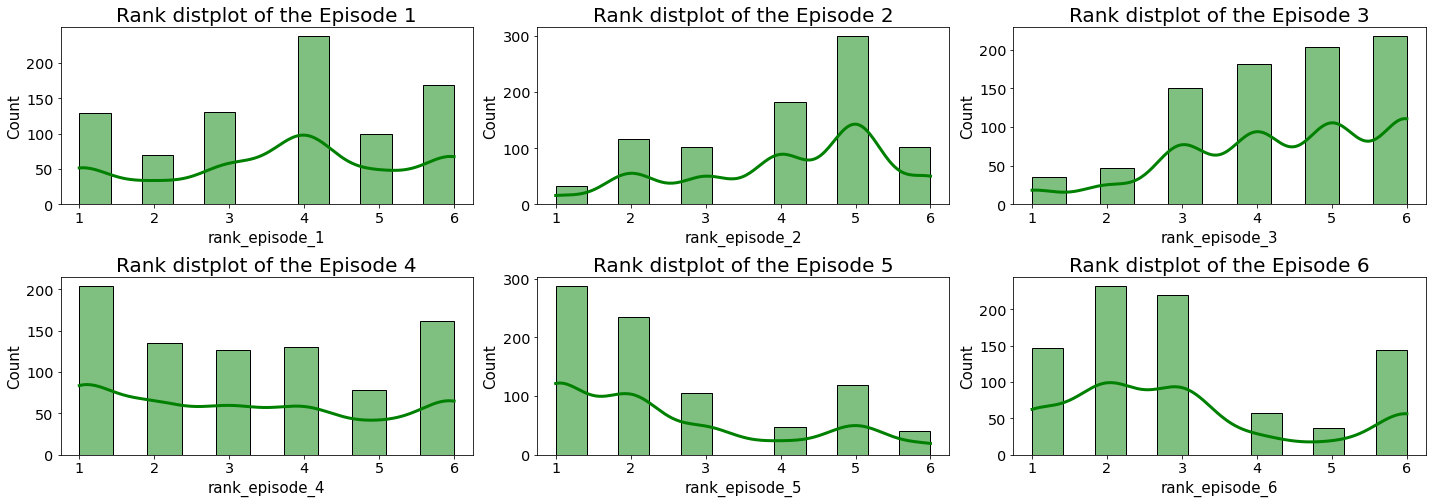

In [57]:
# Distplot
plt.figure(figsize = (20,10))
for i in range(0, len(num_seen_true)):
    plt.subplot(3, int(len(num_seen_true)/2), i+1)
    sns.histplot(x = df_seen_true[num_seen_true[i]], kde = True, color = 'green')
    plt.title(f'Rank distplot of the Episode {i+1}', fontsize = 20)
    plt.xlabel(num_seen_true[i], fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.tight_layout()

## Exploring categorical variables

In [58]:
# Checking the statistics of the categorical variables
df_seen_true[cats_seen_true].describe()

,seen_any_film,consider_starwars_fan,seen_episode_1,seen_episode_2,seen_episode_3,seen_episode_4,seen_episode_5,seen_episode_6,popularity_han_solo,popularity_luke_skywalker,popularity_princess_leia_organa,popularity_anakin_skywalker,popularity_obi_wan_kenobi,popularity_emperor_palpatine,popularity_darth_vader,popularity_lando_calrissian,popularity_boba_fett,popularity_c-3p0,popularity_r2_d2,popularity_jar_jar_binks,popularity_padme_amidala,popularity_yoda,shot_first,familiar_expanded_universe,consider_fan_expanded_universe,consider_fan_star_trek,gender,age,household_income,education,location
count,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835,835
unique,1,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,3,2,2,2,2,4,5,5,9
top,True,True,True,True,True,True,True,True,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,False,False,True,Male,45-60,"$50,000 - $99,999",Bachelor degree,Pacific
freq,835,552,673,571,550,607,758,738,617,556,552,282,602,235,319,251,272,483,568,219,229,615,333,622,736,423,438,256,399,281,164


Some immediate observations:
* Most of those who have watched at least one movie consider themselves a fan of the franchise.
* The most favorite characters are **Han Solo, Luke Skywalker, Princess Leia, Obi Wan Kenobi, Darth Vader, Yoda**.
* Most of the respondents think **Han** shot first.
* Although most of the respondents consider themselves a fan of the franchise, the majority isn't familiar and don't consider themselves a fan of the expanded universe.
* Most of the respondents are fans of the Star Trek franchise
* The most frequent gender is Male
* The majority of the respondents are 45 - 60 years old
* The most common Household Income is in the range 50000 - 99999
* Most of the respondents have bachelor degree
* The most frequent region is the Pacific


In [59]:
# Listing the total registers for each categorical variable
for col in cats_seen_true:
    print(f'Total registers for each category of the variable {col}:')
    print(df_seen_true[col].value_counts())
    print()

Total registers for each category of the variable seen_any_film:
True    835
Name: seen_any_film, dtype: int64

Total registers for each category of the variable consider_starwars_fan:
True     552
False    283
Name: consider_starwars_fan, dtype: int64

Total registers for each category of the variable seen_episode_1:
True     673
False    162
Name: seen_episode_1, dtype: int64

Total registers for each category of the variable seen_episode_2:
True     571
False    264
Name: seen_episode_2, dtype: int64

Total registers for each category of the variable seen_episode_3:
True     550
False    285
Name: seen_episode_3, dtype: int64

Total registers for each category of the variable seen_episode_4:
True     607
False    228
Name: seen_episode_4, dtype: int64

Total registers for each category of the variable seen_episode_5:
True     758
False     77
Name: seen_episode_5, dtype: int64

Total registers for each category of the variable seen_episode_6:
True     738
False     97
Name: seen_epi

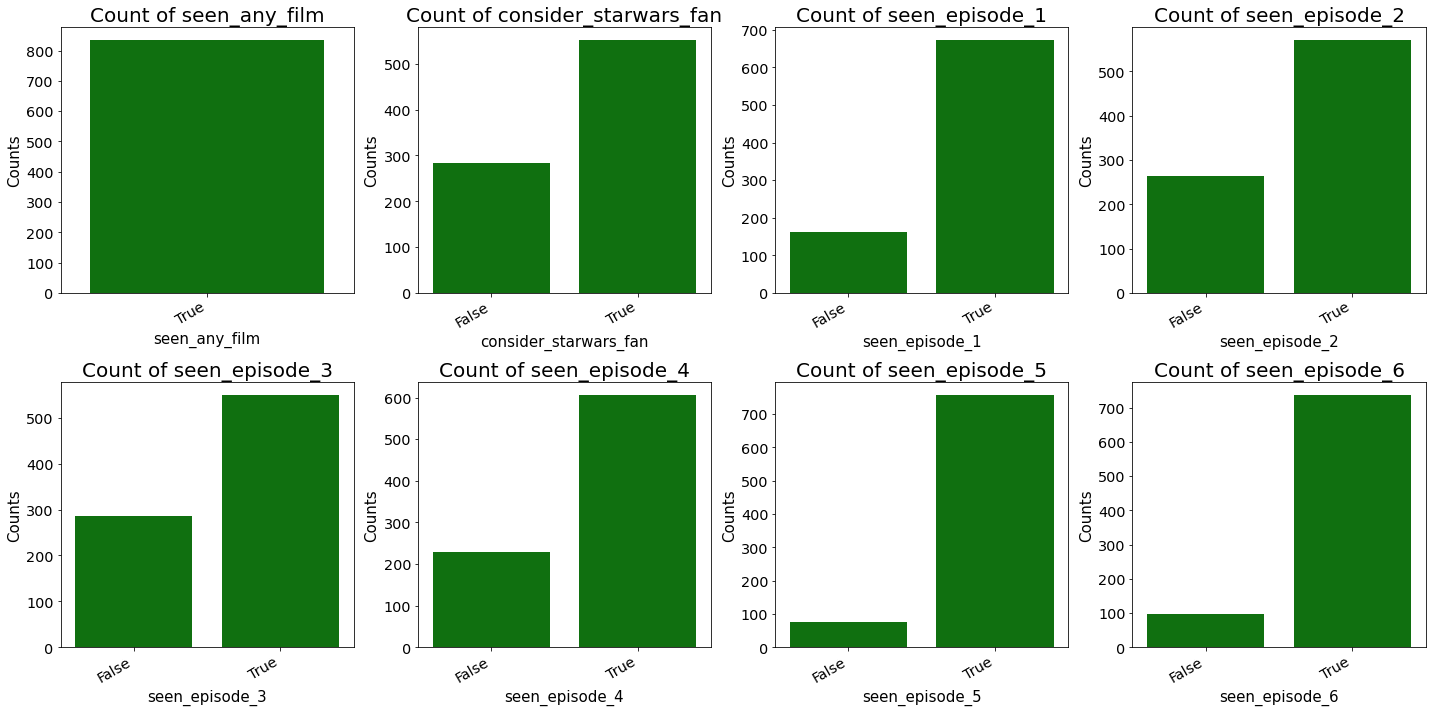

In [60]:
# Countplots fans and films
countplot_columns(df_seen_true, cats_seen_true, 2, 4, 0, 8)

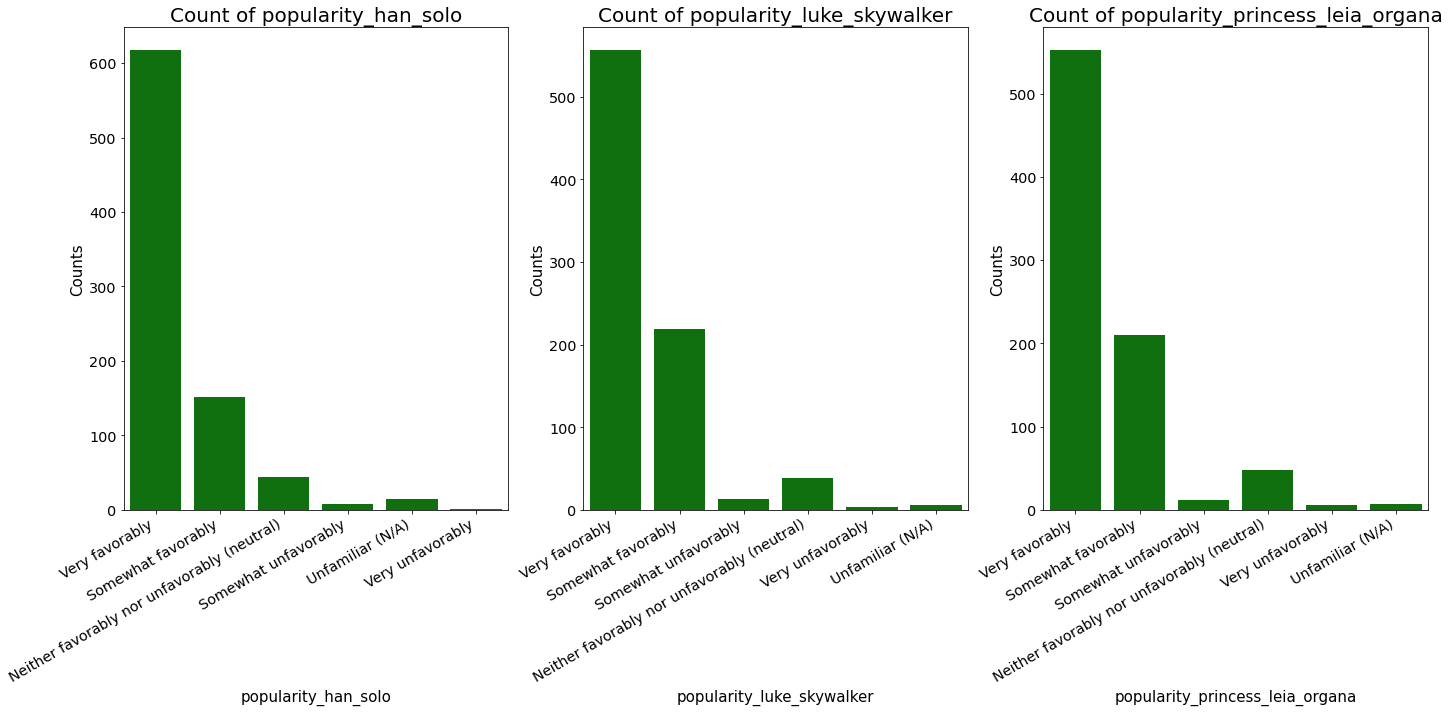

In [61]:
# Countplots popularity 1
countplot_columns(df_seen_true, cats_seen_true, 1, 3, 8,11)

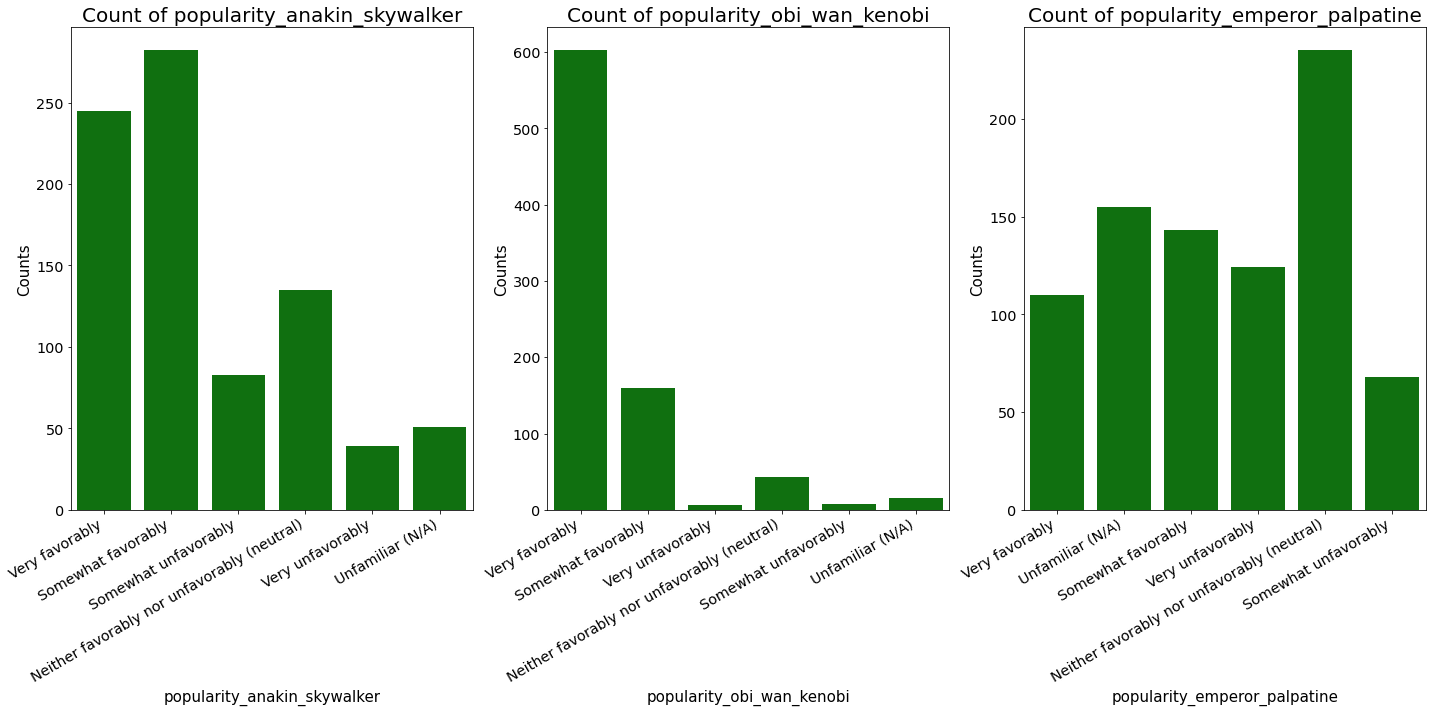

In [62]:
# Countplots popularity 2
countplot_columns(df_seen_true, cats_seen_true, 1, 3, 11,14)

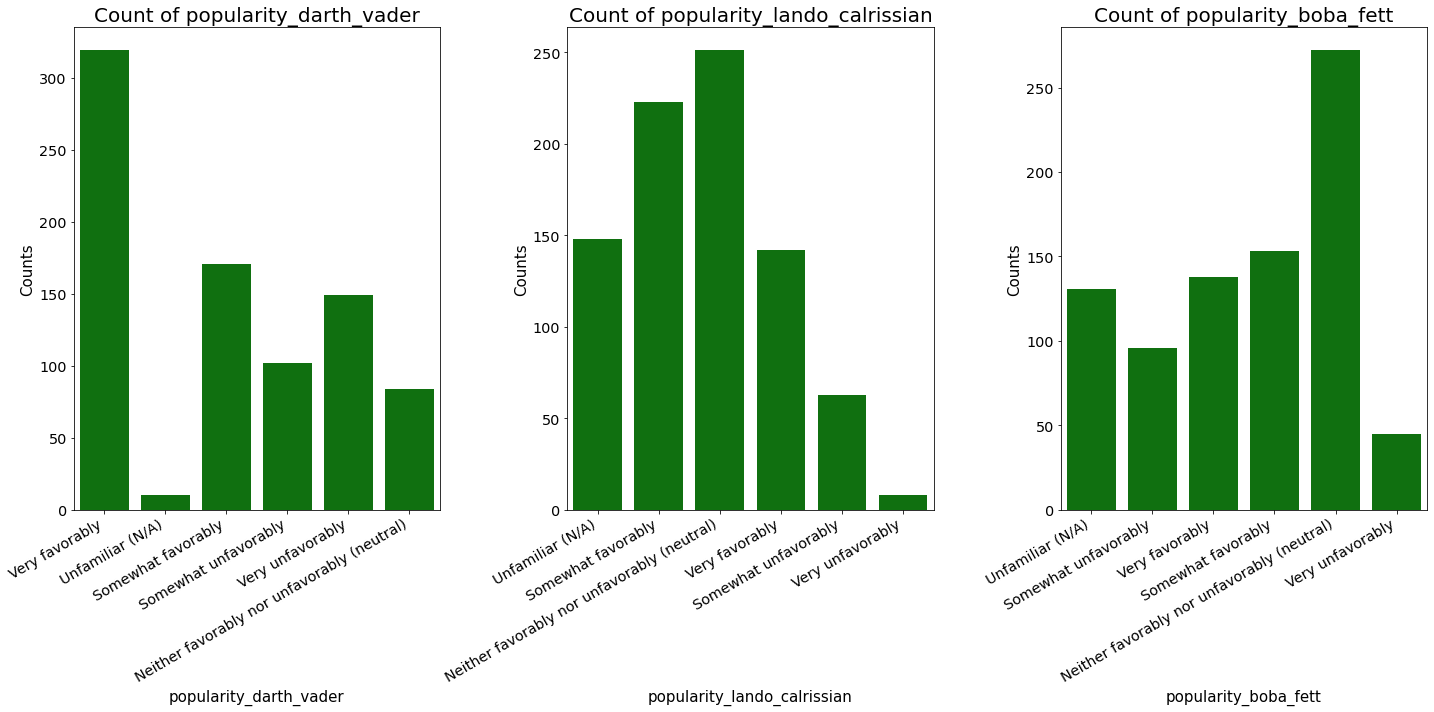

In [63]:
# Countplots popularity 3
countplot_columns(df_seen_true, cats_seen_true, 1, 3, 14,17)

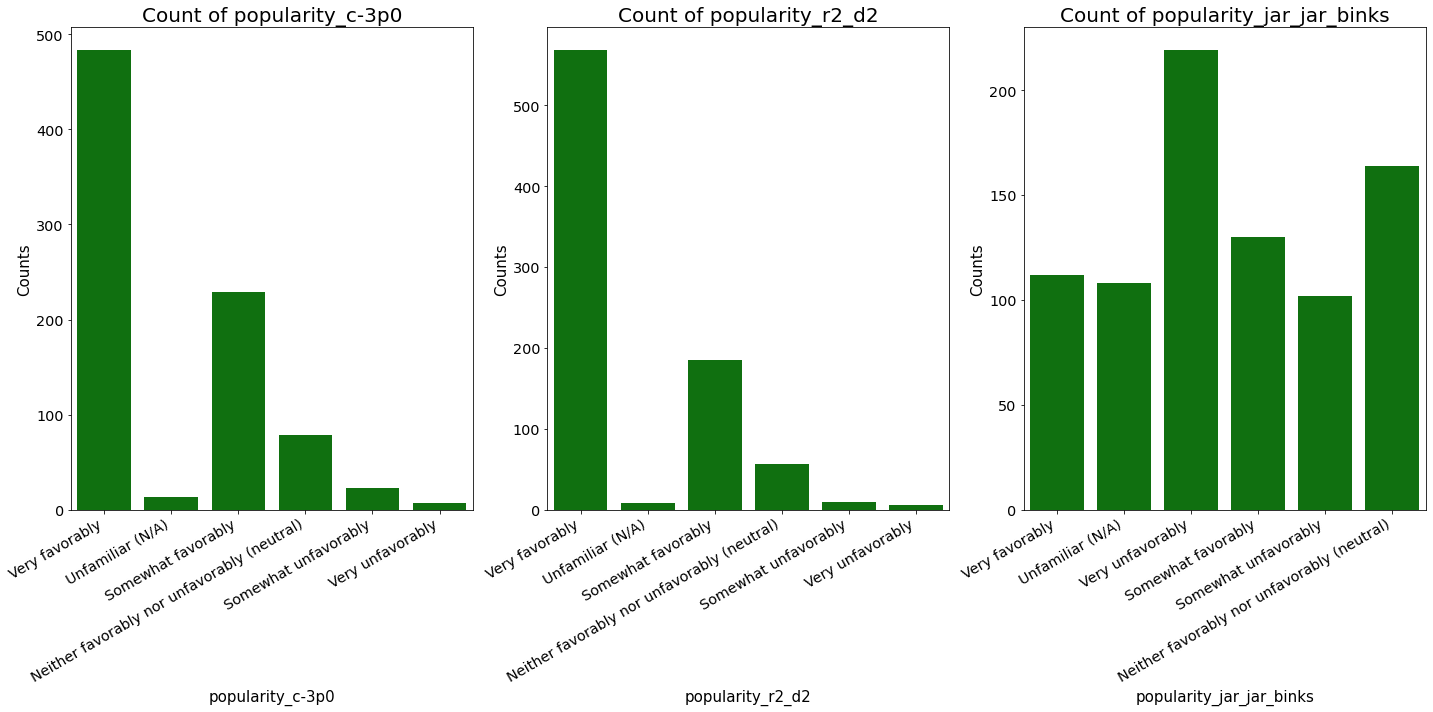

In [64]:
# Countplots popularity 4
countplot_columns(df_seen_true, cats_seen_true, 1, 3, 17,20)

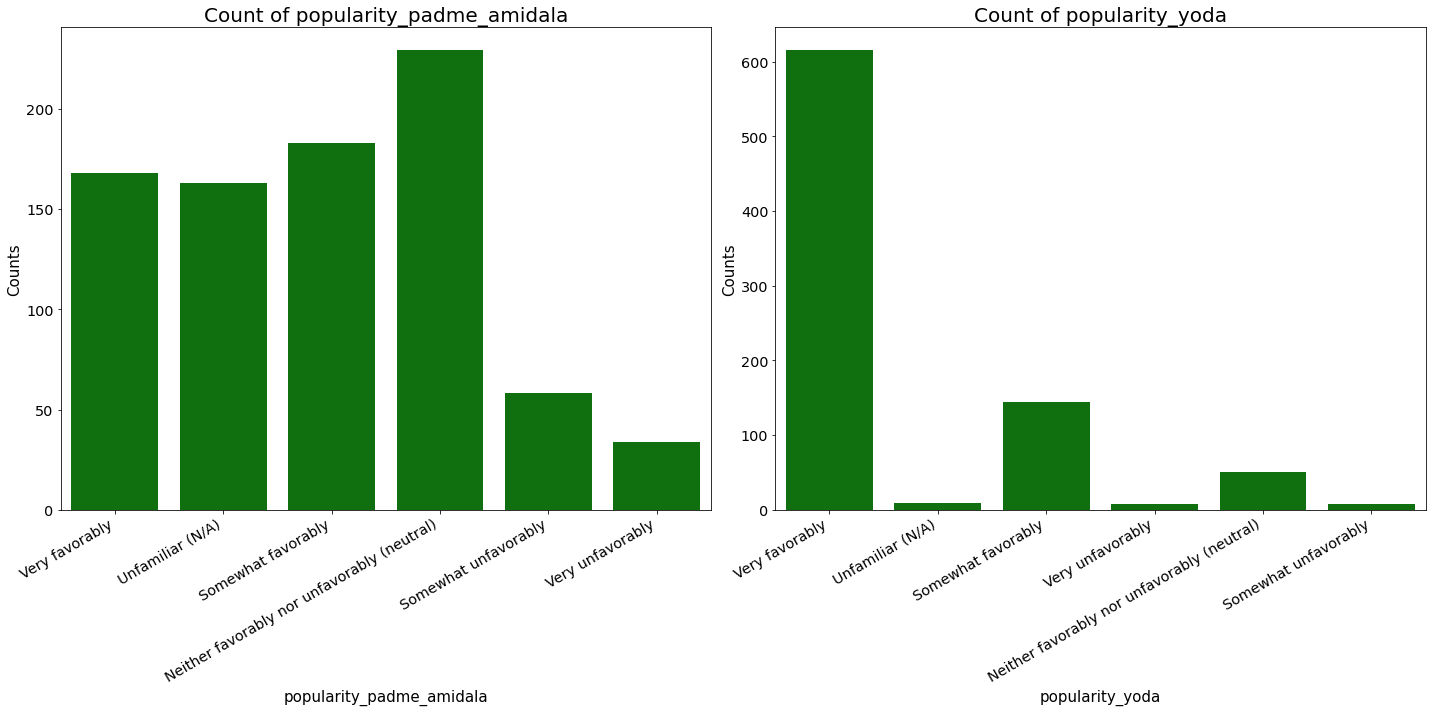

In [65]:
# Countplots popularity 5
countplot_columns(df_seen_true, cats_seen_true, 1, 2, 20,22)

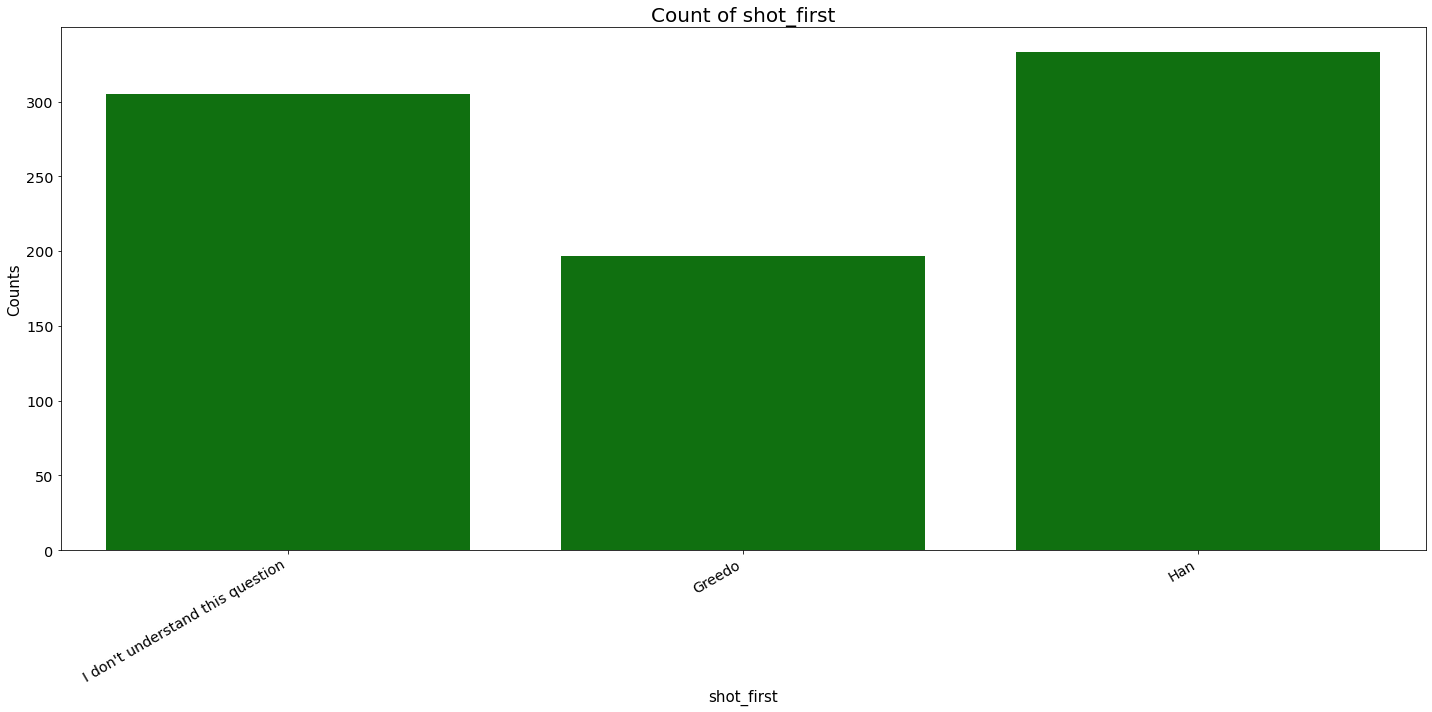

In [66]:
# Countplots who shot first
countplot_columns(df_seen_true, cats_seen_true, 1, 1, 22, 23)

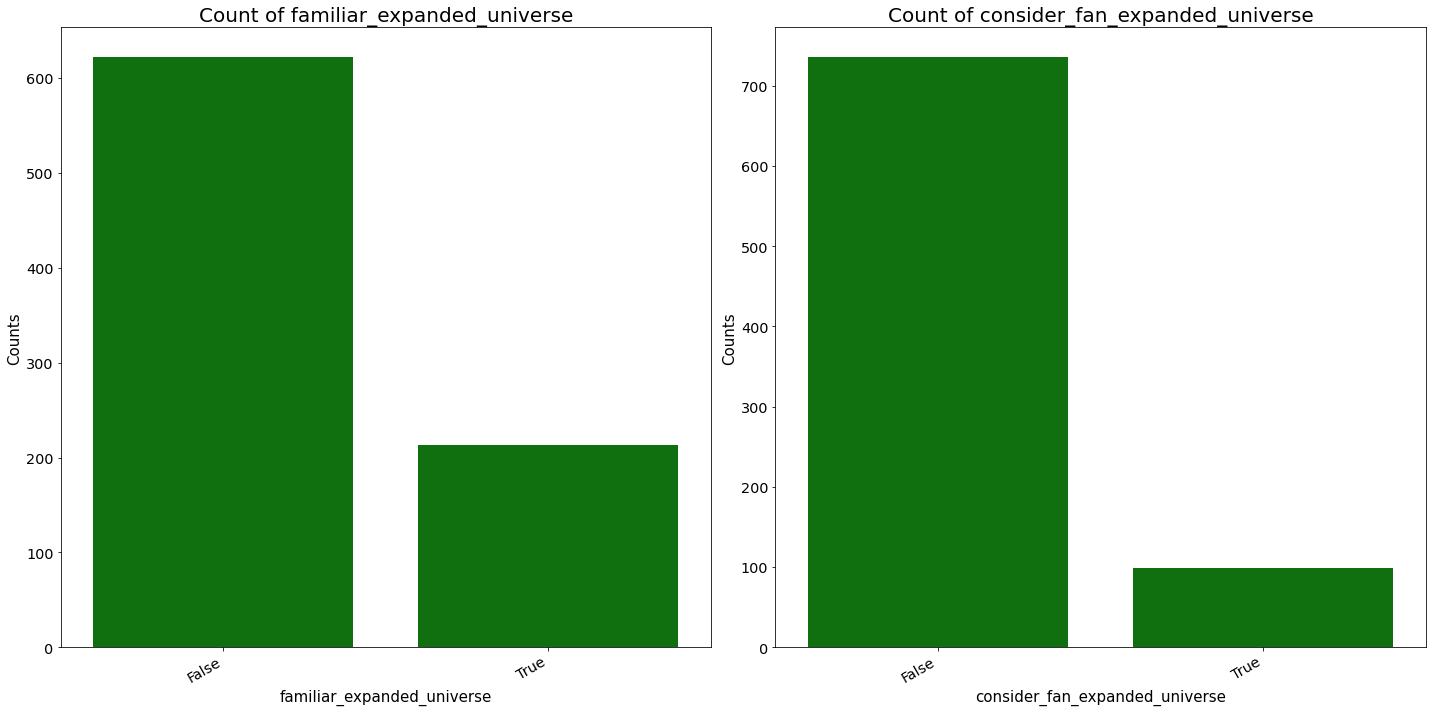

In [67]:
# Countplots expanded universe and startrek
countplot_columns(df_seen_true, cats_seen_true, 1, 2, 23, 25)

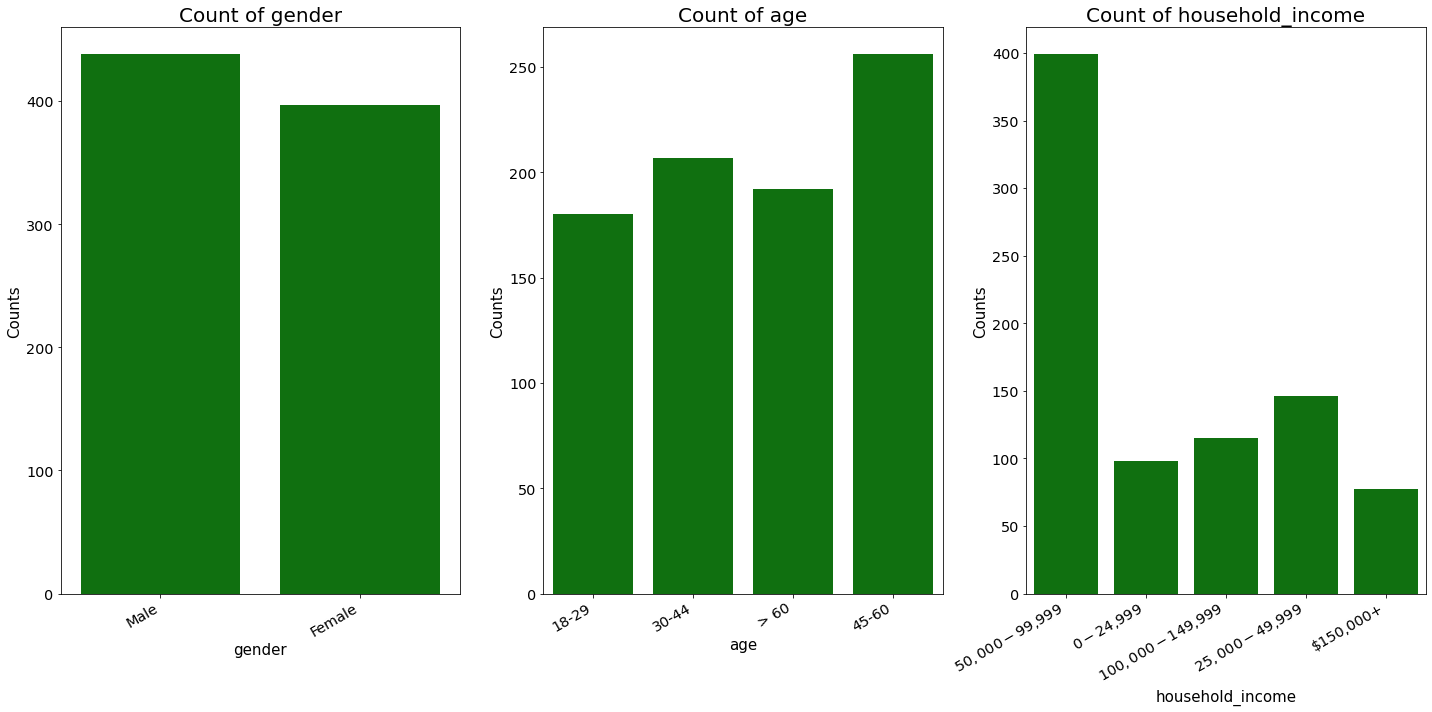

In [68]:
# Countplots gender, age, income
countplot_columns(df_seen_true, cats_seen_true, 1, 3, 26, 29)

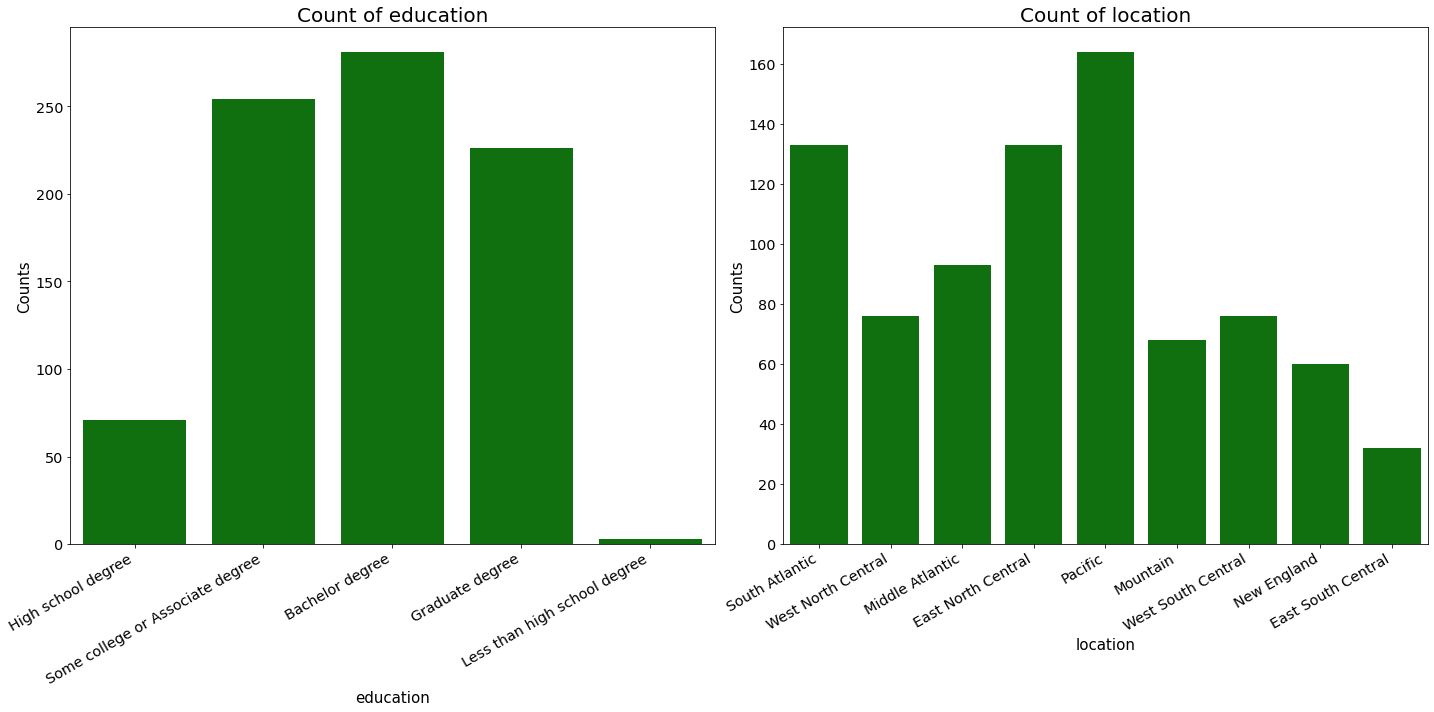

In [69]:
# Countplots education, location
countplot_columns(df_seen_true, cats_seen_true, 1, 2, 29, 31)

## Finding the most seen film
We'll now identify the most seen film considering some characteristics of the viewers, like if they are a fan or not of the franchise, if they've seen only 1 or all of the 6 films and their gender.

In [70]:
# Head of the dataframe for reference
df_seen_true.head(3)

,RespondentID,seen_any_film,consider_starwars_fan,seen_episode_1,seen_episode_2,seen_episode_3,seen_episode_4,seen_episode_5,seen_episode_6,rank_episode_1,rank_episode_2,rank_episode_3,rank_episode_4,rank_episode_5,rank_episode_6,popularity_han_solo,popularity_luke_skywalker,popularity_princess_leia_organa,popularity_anakin_skywalker,popularity_obi_wan_kenobi,popularity_emperor_palpatine,popularity_darth_vader,popularity_lando_calrissian,popularity_boba_fett,popularity_c-3p0,popularity_r2_d2,popularity_jar_jar_binks,popularity_padme_amidala,popularity_yoda,shot_first,familiar_expanded_universe,consider_fan_expanded_universe,consider_fan_star_trek,gender,age,household_income,education,location
0,3292879998.0,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,"$50,000 - $99,999",High school degree,South Atlantic
1,3292765271.0,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,False,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
2,3292763116.0,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,False,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [71]:
# Inserting a new column to identify the number of the films seen by each viewer
df_seen_true.insert(3, 'number_seen', df_seen_true.loc[:,'seen_episode_1':'seen_episode_6'].sum(axis = 1))

In [72]:
# Useful Dataframes
df_seen_fans = df_seen_true[df_seen_true['consider_starwars_fan'] == True] # Those considered fans
df_seen_male = df_seen_true[df_seen_true['gender'] == 'Male'] # total male viewers
df_seen_female = df_seen_true[df_seen_true['gender'] == 'Female'] # total female viewers
df_male_fans = df_seen_fans[df_seen_fans['gender'] == 'Male'] # male fans
df_female_fans = df_seen_fans[df_seen_fans['gender'] == 'Female'] # female fans
df_seen_one_film = df_seen_true[df_seen_true['number_seen'] == 1] # Watched only 1 film
df_seen_six_films = df_seen_true[df_seen_true['number_seen'] == 6] # Watched the 6 films

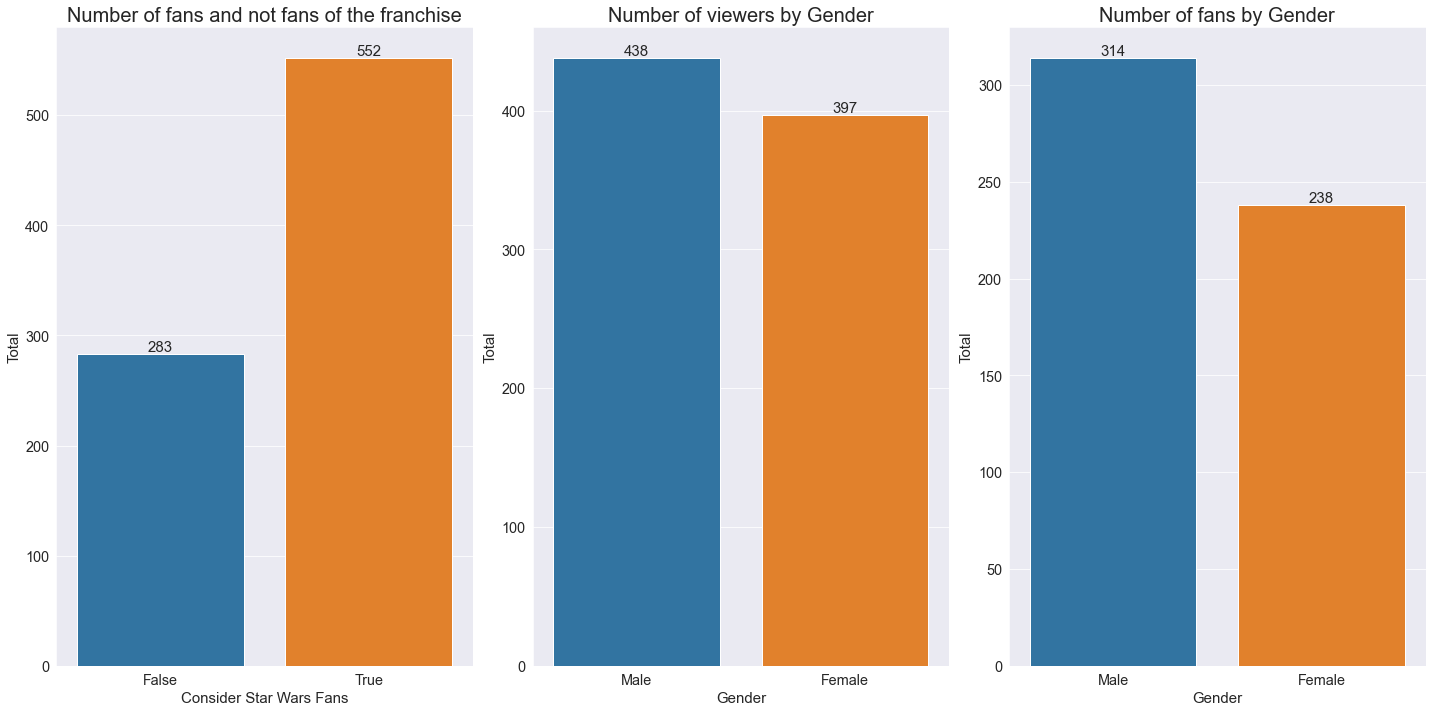

In [73]:
# Plots of number of views

# Plot paramets
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')

# Plot of total views by fans and not fans
plt.subplot(1,3,1)
ax = sns.countplot(x='consider_starwars_fan', data=df_seen_true) 
ax.bar_label(ax.containers[0], fontsize = 15) # value over the bars

plt.title('Number of fans and not fans of the franchise', fontsize = 20)
plt.xlabel('Consider Star Wars Fans', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.tight_layout()

# Plot of number of views by gender
plt.subplot(1,3,2)
ax = sns.countplot(x='gender', data=df_seen_true)
ax.bar_label(ax.containers[0], fontsize = 15) # value over the bars

plt.title('Number of viewers by Gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.tight_layout()

# Plot of number of fans by gender
plt.subplot(1,3,3)
ax = sns.countplot(x='gender', data=df_seen_fans)

for container in ax.containers:
    ax.bar_label(container, fontsize = 15) # Value over the bars when 'hue' exists

plt.title('Number of fans by Gender', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Total', fontsize = 15)

plt.tight_layout()

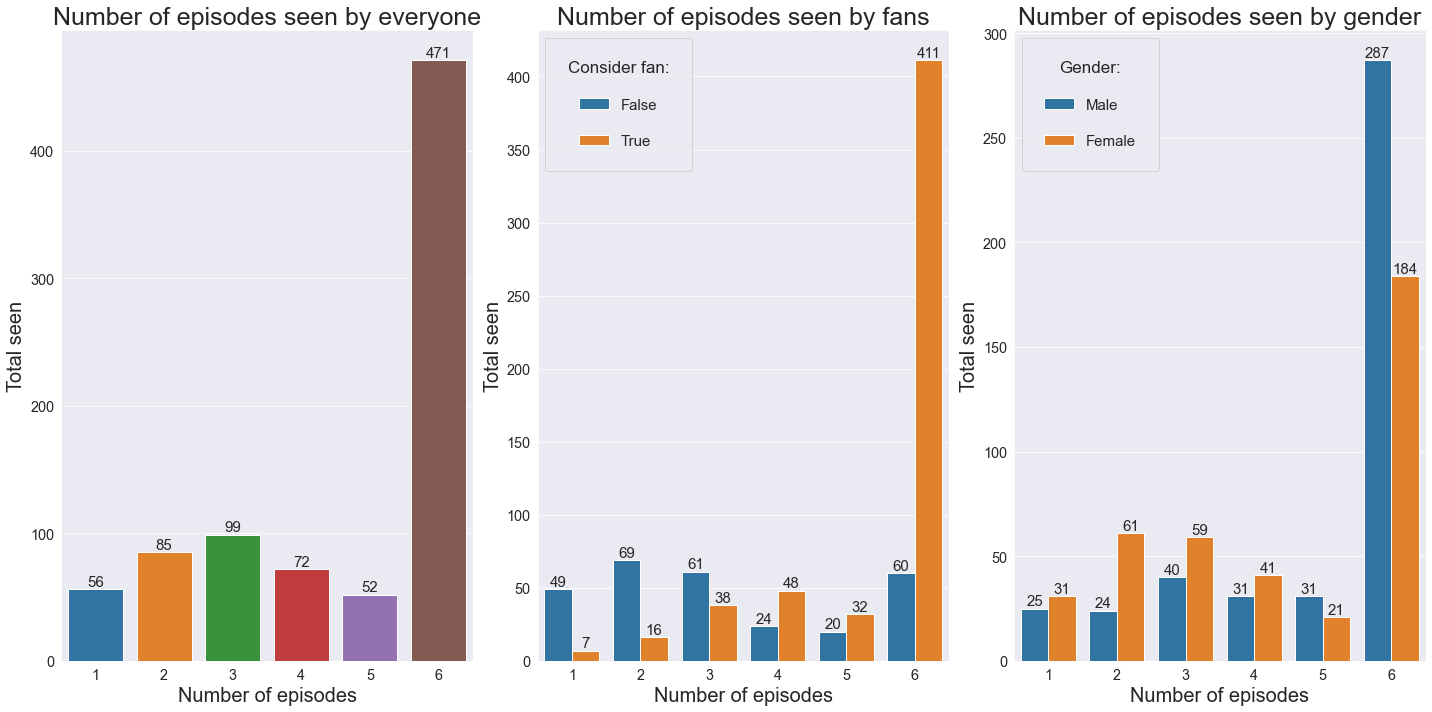

In [74]:
# Numbers of episodes seen

# Plot parameters
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')

# Number of episodes seen by everyone
plt.subplot(1,3,1)

ax = sns.countplot(data = df_seen_true, x = 'number_seen')
ax.bar_label(ax.containers[0], fontsize = 15)
plt.title('Number of episodes seen by everyone', fontsize = 25)
plt.xlabel('Number of episodes', fontsize = 20)
plt.ylabel('Total seen', fontsize = 20)
plt.tight_layout()

# Number of episodes seen by fans
plt.subplot(1,3,2)
ax = sns.countplot(data = df_seen_true, x = 'number_seen', hue = 'consider_starwars_fan')
for container in ax.containers:
    ax.bar_label(container, fontsize = 15)


plt.title('Number of episodes seen by fans', fontsize = 25)
plt.xlabel('Number of episodes', fontsize = 20)
plt.ylabel('Total seen', fontsize = 20)
plt.legend(loc = 'best', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 15, 
           title = 'Consider fan:',
          title_fontsize = 17)
plt.tight_layout()

# Number of episodes seen by gender
plt.subplot(1,3,3)
ax = sns.countplot(data = df_seen_true, x = 'number_seen', hue = 'gender')
for container in ax.containers:
    ax.bar_label(container, fontsize = 15)


plt.title('Number of episodes seen by gender', fontsize = 25)
plt.xlabel('Number of episodes', fontsize = 20)
plt.ylabel('Total seen', fontsize = 20)
plt.legend(loc = 'best', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 15, 
           title = 'Gender:',
          title_fontsize = 17)
plt.tight_layout()

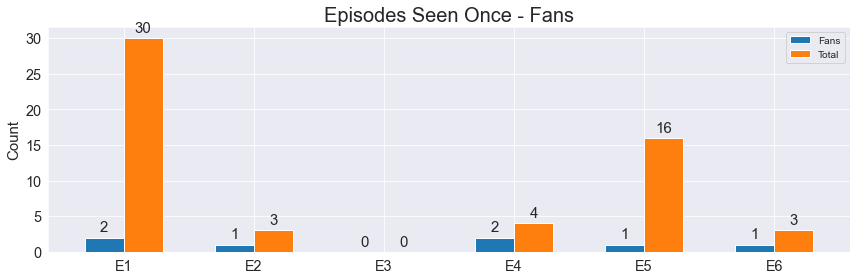

In [75]:
# Episodes seen only once - Fans
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']
seen_once_total = df_seen_one_film.loc[:,'seen_episode_1':'seen_episode_6'].sum()
seen_once_fans = df_seen_one_film.loc[df_seen_one_film['consider_starwars_fan']== True, 
                                      'seen_episode_1':'seen_episode_6'].sum()

plot_bars(seen_once_fans, seen_once_total, eps, 'Fans', 'Total', 'Episodes Seen Once - Fans', 'Count')

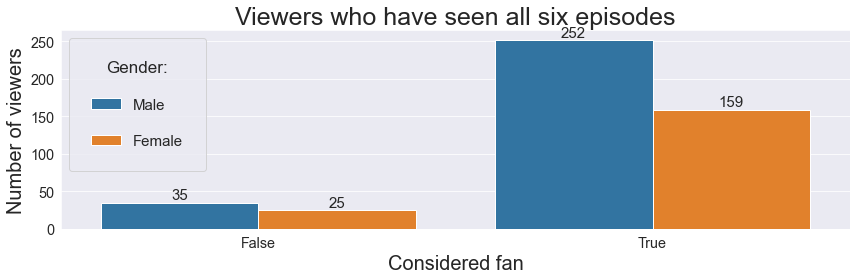

In [76]:
ax = sns.countplot(data = df_seen_six_films, x = 'consider_starwars_fan', hue = 'gender')
for container in ax.containers:
    ax.bar_label(container, fontsize = 15)


plt.title('Viewers who have seen all six episodes', fontsize = 25)
plt.xlabel('Considered fan', fontsize = 20)
plt.ylabel('Number of viewers', fontsize = 20)
plt.legend(loc = 'best', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 15, 
           title = 'Gender:',
          title_fontsize = 17)
plt.tight_layout()

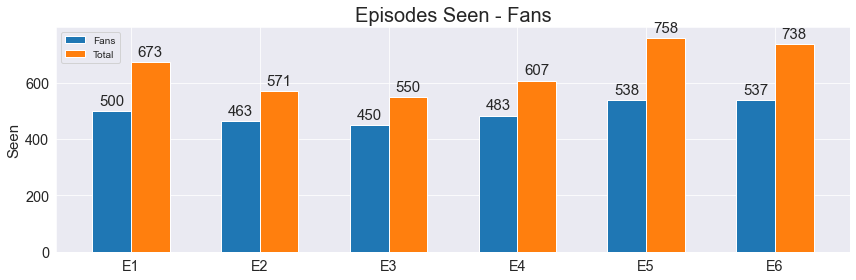

In [77]:
# Plots of episodes seen - Total - Fans
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']
total_seen = df_seen_true.loc[:, 'seen_episode_1':'seen_episode_6'].sum()
total_seen_fans = df_seen_fans.loc[:, 'seen_episode_1':'seen_episode_6'].sum()

plot_bars(total_seen_fans, total_seen, eps, 'Fans', 'Total', 'Episodes Seen - Fans', 'Seen')

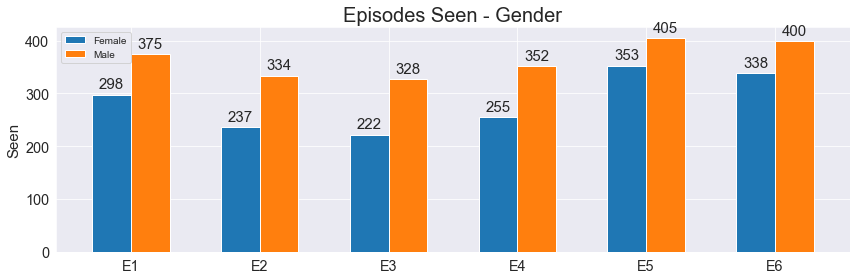

In [78]:
# Plots of episodes seen - Gender
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']
total_seen_male = df_seen_male.loc[:, 'seen_episode_1':'seen_episode_6'].sum()
total_seen_female = df_seen_female.loc[:, 'seen_episode_1':'seen_episode_6'].sum()

plot_bars(total_seen_female, total_seen_male, eps, 'Female', 'Male', 'Episodes Seen - Gender', 'Seen')

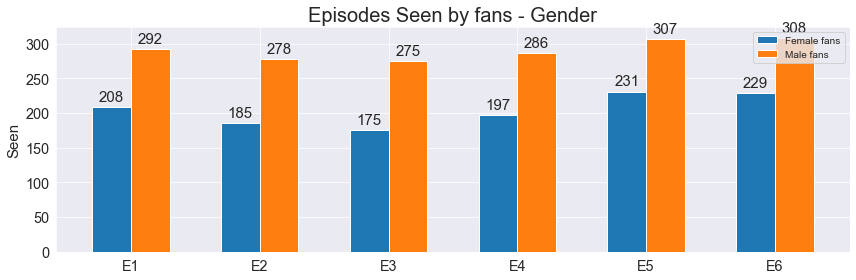

In [79]:
# Plots of episodes seen - Fans by Gender
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']
male_fans = df_male_fans.loc[:, 'seen_episode_1':'seen_episode_6'].sum()
female_fans = df_female_fans.loc[:, 'seen_episode_1':'seen_episode_6'].sum()

plot_bars(female_fans, male_fans, eps, 'Female fans', 'Male fans', 'Episodes Seen by fans - Gender', 'Seen')

### Conclusion about the most seen episode

By the analysis above about the most seen episode and the characteristics of the viewers, we were able to conclude:

* **About the distribution of the viewers:**
    * Most of the viewers consider themselves Star Wars fans
    * Most of the viewers are male
    * Most of the fans are also male
    
* **About the number of episodes seen:**
    * Most of the viewers have seen all 6 episodes of the Star Wars franchise
    * The majority of those who have seen all 6 episodes are fans
    * The majority of the female viewers have seen from 1 to 4 episodes. 5 and 6 episodes were most seen by male viewers.
    * Episode I was the most seen once, while episode III wasn't watched only once by anyone.
    
* **About the most seen episode:**
    * Episode V was the most seen by everyone and by the fans
    * Episode V was the most seen by male and female in general
    * Episode V was the most seen by female fans, while episode VI was the most seen by male fans
    
Therefore, it's possible to conclude that in all of the scenarios above (except male fans by a difference of 1) the most seen episode was **Star Wars: Episode V The Empire Strikes Back**.

## Finding the best ranked film
Before starting the analysis, we should establish whether the vote was valid or not. When cleaning the data, we've input the mode for the NaN values in the ranking columns, therefore we created some inconsistencies for it. For example, someone might've said one hasn't seen Episode III, but there is a vote computed for episode III by this person. This is an inconsistency. We'll keep only the valid votes.

To proceed with the analysis, we will consider two major groups:
* All the valid votes
* Those who have seen all six films

After that we will see if there's any difference between the results.

**Remember:** For the ranks, 1 represents the best rank and 5 represents the worst rank.

### Obtaining all dataframes that will be used

In [80]:
# Obtaining the dataframes for valid votes - Total
df_valid_ep1 = df_seen_true[df_seen_true['seen_episode_1']== True].reset_index(drop = True)
df_valid_ep2 = df_seen_true[df_seen_true['seen_episode_2']== True].reset_index(drop = True)
df_valid_ep3 = df_seen_true[df_seen_true['seen_episode_3']== True].reset_index(drop = True)
df_valid_ep4 = df_seen_true[df_seen_true['seen_episode_4']== True].reset_index(drop = True)
df_valid_ep5 = df_seen_true[df_seen_true['seen_episode_5']== True].reset_index(drop = True)
df_valid_ep6 = df_seen_true[df_seen_true['seen_episode_6']== True].reset_index(drop = True)

# Obtaining the dataframes for valid votes by gender- Total
df_valid_ep1_male = df_valid_ep1[df_valid_ep1['gender']== 'Male'].reset_index(drop = True)
df_valid_ep1_female = df_valid_ep1[df_valid_ep1['gender']== 'Female'].reset_index(drop = True)
df_valid_ep2_male = df_valid_ep2[df_valid_ep2['gender']== 'Male'].reset_index(drop = True)
df_valid_ep2_female = df_valid_ep2[df_valid_ep2['gender']== 'Female'].reset_index(drop = True)
df_valid_ep3_male = df_valid_ep3[df_valid_ep3['gender']== 'Male'].reset_index(drop = True)
df_valid_ep3_female = df_valid_ep3[df_valid_ep3['gender']== 'Female'].reset_index(drop = True)
df_valid_ep4_male = df_valid_ep4[df_valid_ep4['gender']== 'Male'].reset_index(drop = True)
df_valid_ep4_female = df_valid_ep4[df_valid_ep4['gender']== 'Female'].reset_index(drop = True)
df_valid_ep5_male = df_valid_ep5[df_valid_ep5['gender']== 'Male'].reset_index(drop = True)
df_valid_ep5_female = df_valid_ep5[df_valid_ep5['gender']== 'Female'].reset_index(drop = True)
df_valid_ep6_male = df_valid_ep6[df_valid_ep6['gender']== 'Male'].reset_index(drop = True)
df_valid_ep6_female = df_valid_ep6[df_valid_ep6['gender']== 'Female'].reset_index(drop = True)

# Obtaining the dataframes for valid votes - Fans
df_valid_fans_ep1 = df_valid_ep1[df_valid_ep1['consider_starwars_fan']== True].reset_index()
df_valid_fans_ep2 = df_valid_ep2[df_valid_ep2['consider_starwars_fan']== True].reset_index()
df_valid_fans_ep3 = df_valid_ep3[df_valid_ep3['consider_starwars_fan']== True].reset_index()
df_valid_fans_ep4 = df_valid_ep4[df_valid_ep4['consider_starwars_fan']== True].reset_index()
df_valid_fans_ep5 = df_valid_ep5[df_valid_ep5['consider_starwars_fan']== True].reset_index()
df_valid_fans_ep6 = df_valid_ep6[df_valid_ep6['consider_starwars_fan']== True].reset_index()

# Obtaining the dataframes for valid votes by gender - Fans
df_valid_fans_ep1_male = df_valid_fans_ep1[df_valid_ep1['gender']== 'Male'].reset_index(drop = True)
df_valid_fans_ep1_female = df_valid_fans_ep1[df_valid_ep1['gender']== 'Female'].reset_index(drop = True)
df_valid_fans_ep2_male = df_valid_fans_ep2[df_valid_ep2['gender']== 'Male'].reset_index(drop = True)
df_valid_fans_ep2_female = df_valid_fans_ep2[df_valid_ep2['gender']== 'Female'].reset_index(drop = True)
df_valid_fans_ep3_male = df_valid_fans_ep3[df_valid_ep3['gender']== 'Male'].reset_index(drop = True)
df_valid_fans_ep3_female = df_valid_fans_ep3[df_valid_ep3['gender']== 'Female'].reset_index(drop = True)
df_valid_fans_ep4_male = df_valid_fans_ep4[df_valid_ep4['gender']== 'Male'].reset_index(drop = True)
df_valid_fans_ep4_female = df_valid_fans_ep4[df_valid_ep4['gender']== 'Female'].reset_index(drop = True)
df_valid_fans_ep5_male = df_valid_fans_ep5[df_valid_ep5['gender']== 'Male'].reset_index(drop = True)
df_valid_fans_ep5_female = df_valid_fans_ep5[df_valid_ep5['gender']== 'Female'].reset_index(drop = True)
df_valid_fans_ep6_male = df_valid_fans_ep6[df_valid_ep6['gender']== 'Male'].reset_index(drop = True)
df_valid_fans_ep6_female = df_valid_fans_ep6[df_valid_ep6['gender']== 'Female'].reset_index(drop = True)

# Obtaining the dataframes for those who've seen all the six films
df_seen_six_films_male = df_seen_six_films[df_seen_six_films['gender'] == 'Male'].reset_index(drop = True)
df_seen_six_films_female = df_seen_six_films[df_seen_six_films['gender'] == 'Female'].reset_index(drop = True)
df_seen_six_films_fans = df_seen_six_films[df_seen_six_films['consider_starwars_fan'] == True].reset_index(drop = True)
df_seen_six_films_male_fans = df_seen_six_films_fans[df_seen_six_films_fans['gender'] == 'Male'].reset_index(drop = True)
df_seen_six_films_female_fans = df_seen_six_films_fans[df_seen_six_films_fans['gender'] == 'Female'].reset_index(drop = True)

### Listing the dataframes

In [81]:
# List of the dataframes for plotting purposes
list_valid_votes = [df_valid_ep1, df_valid_ep2, df_valid_ep3, df_valid_ep4, df_valid_ep5, df_valid_ep6]

list_valid_votes_male = [df_valid_ep1_male, df_valid_ep2_male, df_valid_ep3_male, df_valid_ep4_male,
                        df_valid_ep5_male, df_valid_ep6_male]

list_valid_votes_female = [df_valid_ep1_female, df_valid_ep2_female, df_valid_ep3_female, df_valid_ep4_female,
                          df_valid_ep5_female, df_valid_ep6_female]

list_valid_votes_fans = [df_valid_fans_ep1, df_valid_fans_ep2, df_valid_fans_ep3, 
                         df_valid_fans_ep4, df_valid_fans_ep5, df_valid_fans_ep6]

list_valid_votes_fans_male = [df_valid_fans_ep1_male, df_valid_fans_ep2_male, df_valid_fans_ep3_male,
                             df_valid_fans_ep4_male, df_valid_fans_ep5_male, df_valid_fans_ep6_male]

list_valid_votes_fans_female = [df_valid_fans_ep1_female, df_valid_fans_ep2_female, df_valid_fans_ep3_female,
                             df_valid_fans_ep4_female, df_valid_fans_ep5_female, df_valid_fans_ep6_female]

list_six_films = [df_seen_six_films, df_seen_six_films_male, df_seen_six_films_female,
                 df_seen_six_films_fans, df_seen_six_films_male_fans, df_seen_six_films_female_fans]

### Analysis on all valid votes

There are 673 valid votes for Episode 1
There are 571 valid votes for Episode 2
There are 550 valid votes for Episode 3
There are 607 valid votes for Episode 4
There are 758 valid votes for Episode 5
There are 738 valid votes for Episode 6
The total is 3897 votes
The difference between the minimum and the maximum valid votes is 208


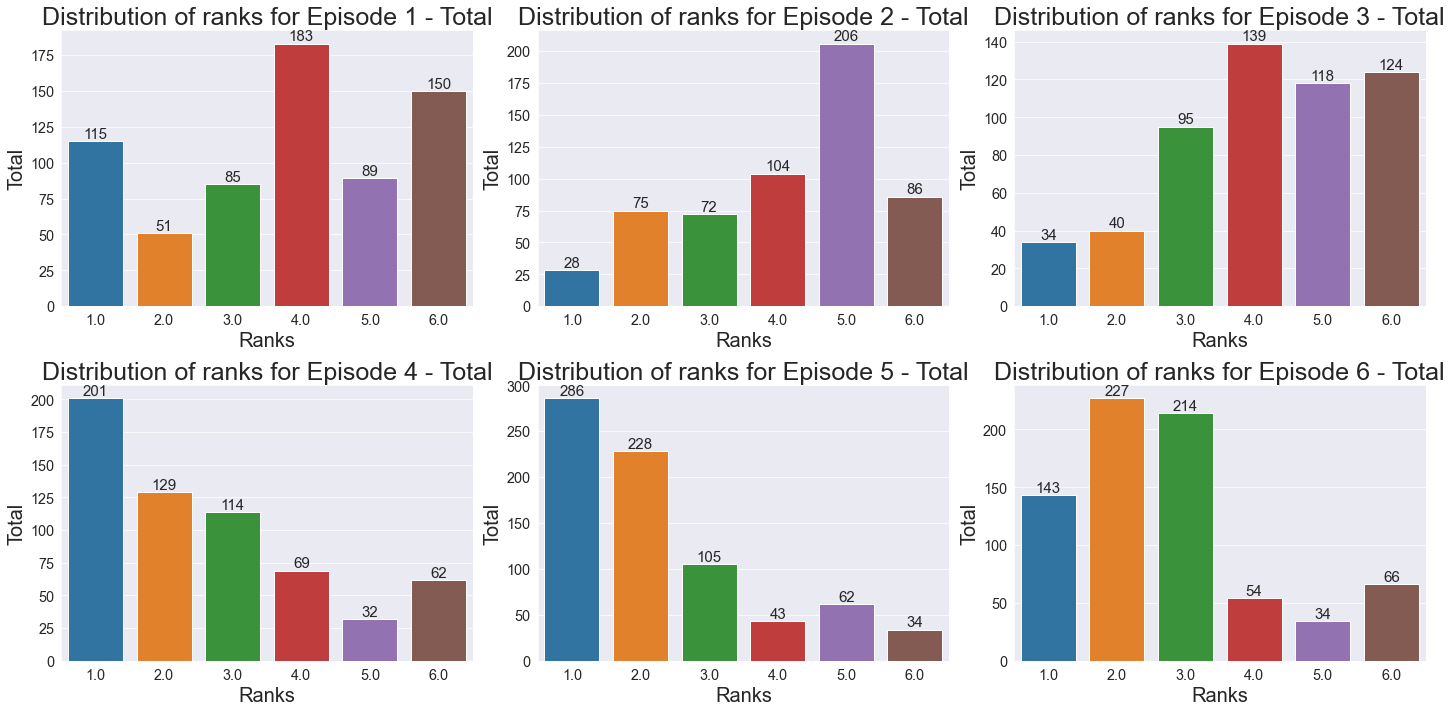

In [82]:
## Total Valid Votes

# Plot parameters
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')

# Ranks for the episodes

for i, df in zip(range(1,7), list_valid_votes):
    plt.subplot(2,3,i)

    ax = sns.countplot(data = df, x = f'rank_episode_{i}')
    ax.bar_label(ax.containers[0], fontsize = 15)
    plt.title(f'Distribution of ranks for Episode {i} - Total', fontsize = 25)
    plt.xlabel('Ranks', fontsize = 20)
    plt.ylabel('Total', fontsize = 20)
    plt.tight_layout()
    
ep = 1
list_validvotes_total = []
for df in list_valid_votes:
    print(f'There are {df.shape[0]} valid votes for Episode {ep}')
    ep+=1
    list_validvotes_total.append(df.shape[0])

difference = len(range(max(list_validvotes_total) - min(list_validvotes_total)))
total_validvotes = sum(list_validvotes_total)
print(f'The total is {total_validvotes} votes')
print(f'The difference between the minimum and the maximum valid votes is {difference}')

There are 500 valid votes by fans for Episode 1
There are 463 valid votes by fans for Episode 2
There are 450 valid votes by fans for Episode 3
There are 483 valid votes by fans for Episode 4
There are 538 valid votes by fans for Episode 5
There are 537 valid votes by fans for Episode 6
The total is 2971 votes
The difference between the minimum and the maximum valid votes is 88


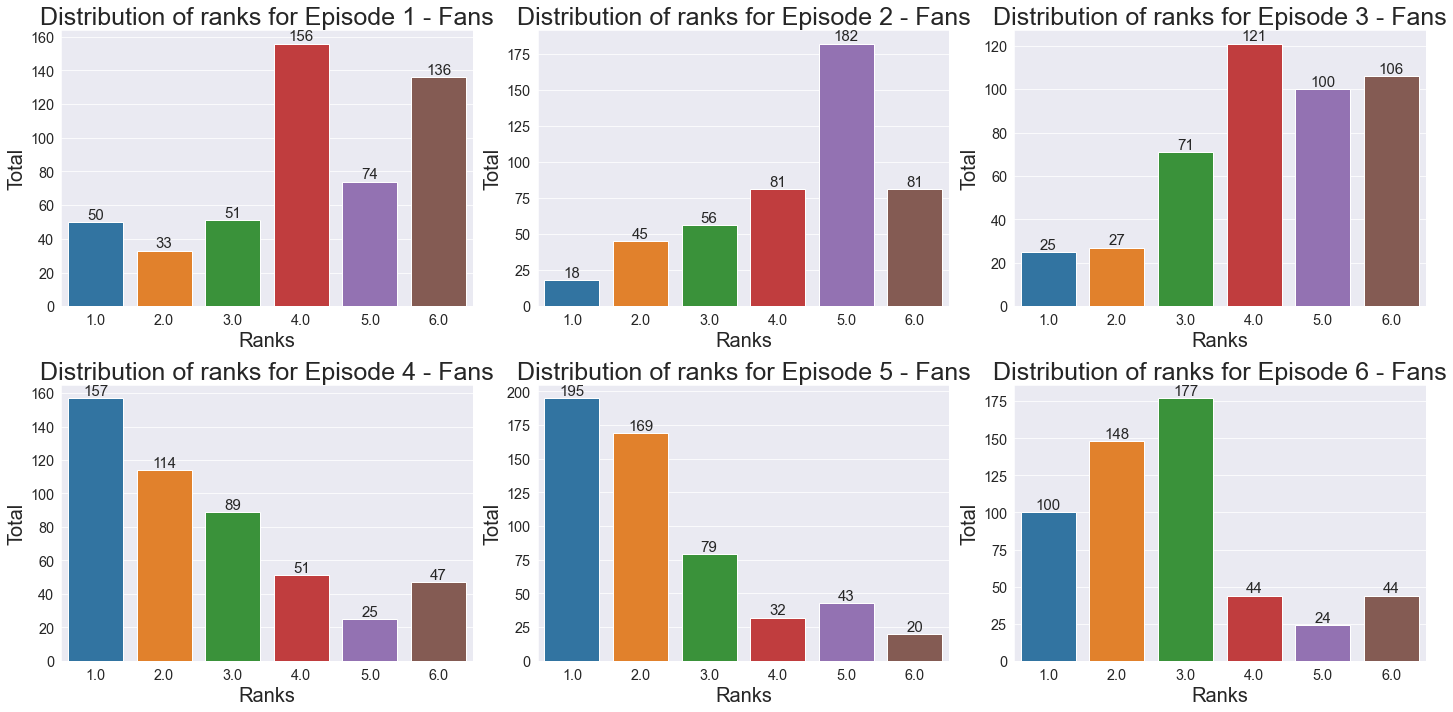

In [83]:
## Total valid votes by fans

# Plot parameters
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')

# Ranks for the episodes
for i, df in zip(range(1,7), list_valid_votes_fans):
    plt.subplot(2,3,i)

    ax = sns.countplot(data = df, x = f'rank_episode_{i}')
    ax.bar_label(ax.containers[0], fontsize = 15)
    
    plt.title(f'Distribution of ranks for Episode {i} - Fans', fontsize = 25)
    plt.xlabel('Ranks', fontsize = 20)
    plt.ylabel('Total', fontsize = 20)
    plt.tight_layout()
    
ep = 1
list_validvotes_fans = []
for df in list_valid_votes_fans:
    print(f'There are {df.shape[0]} valid votes by fans for Episode {ep}')
    ep+=1
    list_validvotes_fans.append(df.shape[0])
    
difference_fans = len(range(max(list_validvotes_fans) - min(list_validvotes_fans)))
total_validvotes_fans = sum(list_validvotes_fans)
print(f'The total is {total_validvotes_fans} votes')
print(f'The difference between the minimum and the maximum valid votes is {difference_fans}')

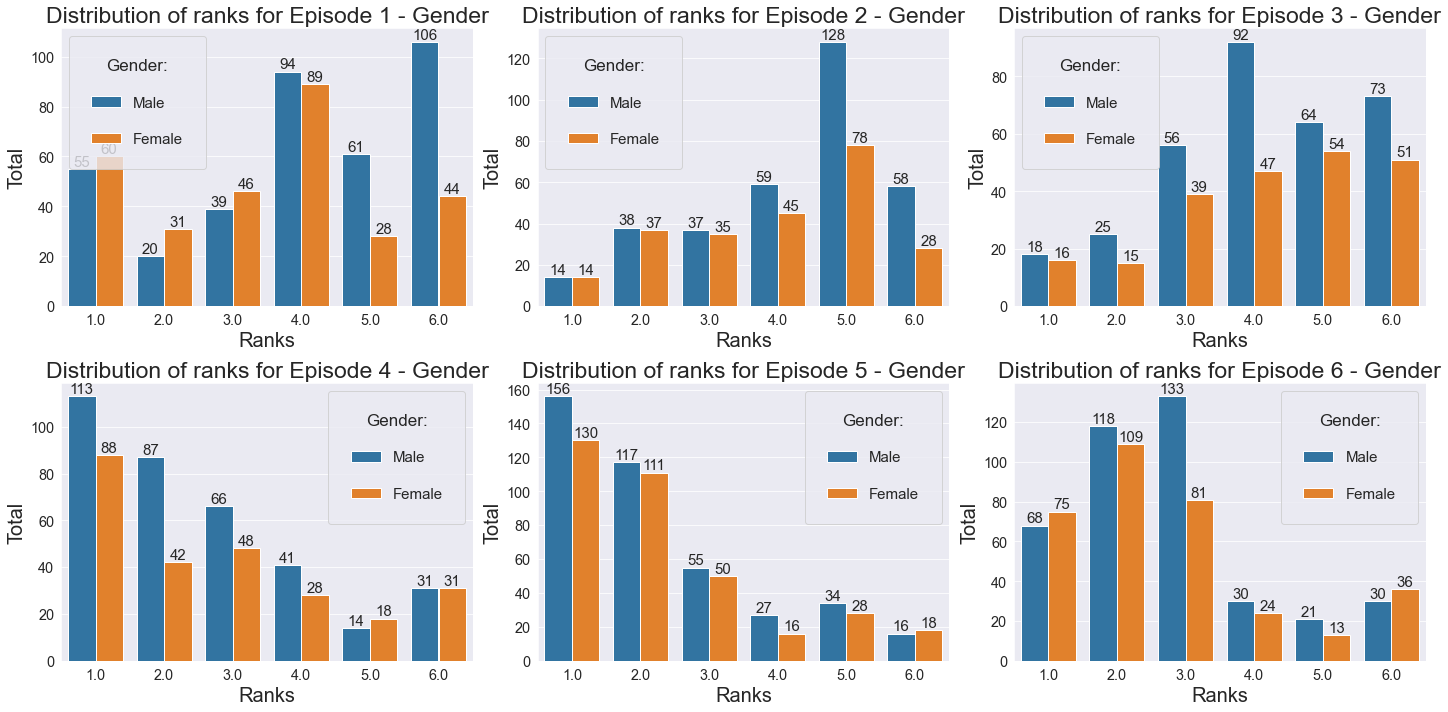

In [84]:
## Distribution of ranks by gender

# Plot parameters
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')

# Ranks for the episodes
for i, df in zip(range(1,7), list_valid_votes):
    plt.subplot(2,3,i)

    ax = sns.countplot(data = df, x = f'rank_episode_{i}', hue = 'gender')
    for container in ax.containers:
        ax.bar_label(container, fontsize = 15)
    
    plt.title(f'Distribution of ranks for Episode {i} - Gender', fontsize = 23)
    plt.xlabel('Ranks', fontsize = 20)
    plt.ylabel('Total', fontsize = 20)
    plt.legend(loc = 'best', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 15, 
           title = 'Gender:',
          title_fontsize = 17)
    plt.tight_layout()

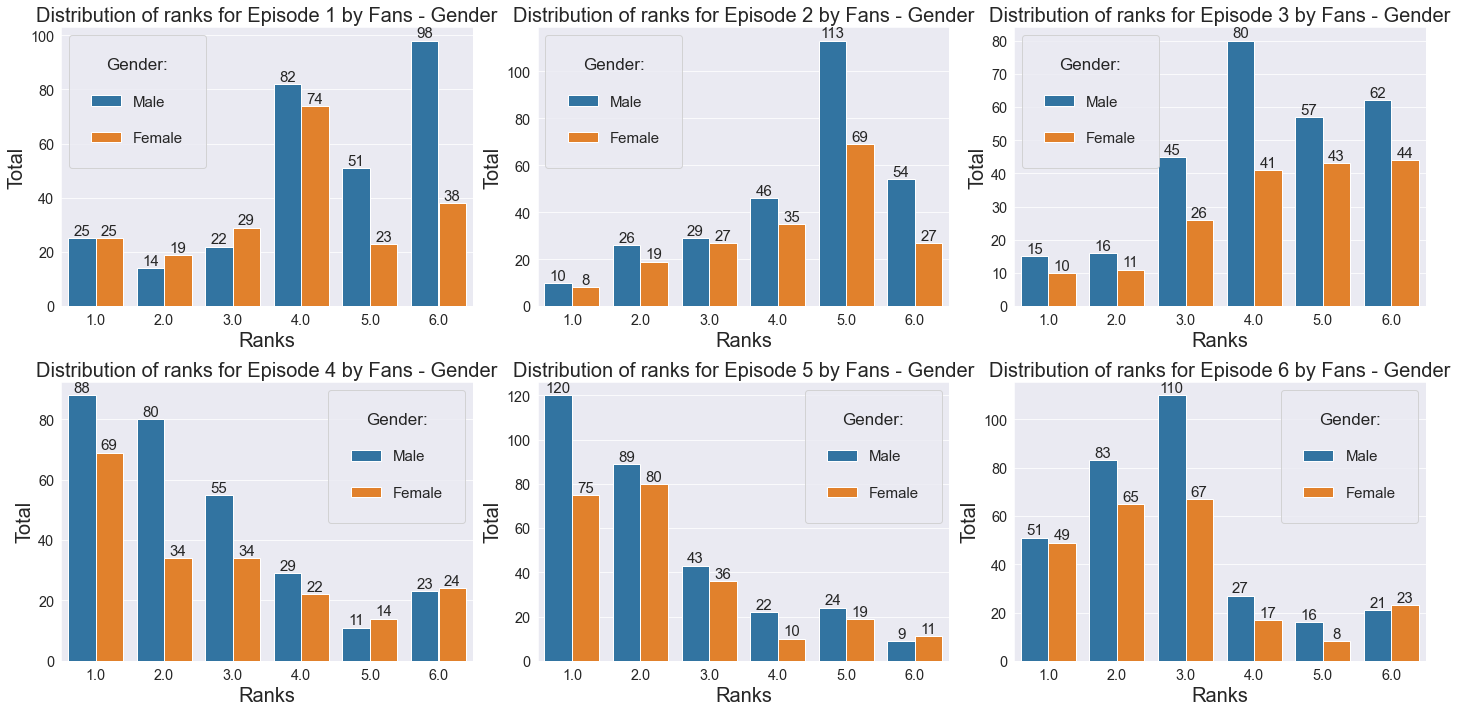

In [85]:
## Distribution of ranks by fans and gender

# Plot parameters
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')

# Ranks for the episodes
for i, df in zip(range(1,7), list_valid_votes_fans):
    plt.subplot(2,3,i)

    ax = sns.countplot(data = df, x = f'rank_episode_{i}', hue = 'gender')
    for container in ax.containers:
        ax.bar_label(container, fontsize = 15)
    
    plt.title(f'Distribution of ranks for Episode {i} by Fans - Gender', fontsize = 20)
    plt.xlabel('Ranks', fontsize = 20)
    plt.ylabel('Total', fontsize = 20)
    plt.legend(loc = 'best', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 15, 
           title = 'Gender:',
          title_fontsize = 17)
    plt.tight_layout()

In [86]:
# Obtaining the mean rank for each episode - Total
list_ranks = []
for i, df in zip(range(1,7), list_valid_votes):
    mean = round(df[f'rank_episode_{i}'].mean(), 2)
    list_ranks.append(mean)
    
# Obtaining the mean rank for each episode by gender - Total
list_ranks_male = []
list_ranks_female = []
for i, df1, df2 in zip(range(1,7), list_valid_votes_male, list_valid_votes_female):
    mean_male = round(df1[f'rank_episode_{i}'].mean(), 2)
    mean_female = round(df2[f'rank_episode_{i}'].mean(), 2)
    list_ranks_male.append(mean_male)
    list_ranks_female.append(mean_female)
    
# Obtaining the mean rank by fans for each episode
list_ranks_fans = []
for i, df in zip(range(1,7), list_valid_votes_fans):
    mean = round(df[f'rank_episode_{i}'].mean(), 2)
    list_ranks_fans.append(mean)
    
# Obtaining the mean rank by fans for each episode - Gender
list_ranks_fans_male = []
list_ranks_fans_female = []
for i, df1, df2 in zip(range(1,7), list_valid_votes_fans_male, list_valid_votes_fans_female):
    mean_male_fans = round(df1[f'rank_episode_{i}'].mean(), 2)
    mean_female_fans = round(df2[f'rank_episode_{i}'].mean(), 2)
    list_ranks_fans_male.append(mean_male_fans)
    list_ranks_fans_female.append(mean_female_fans)

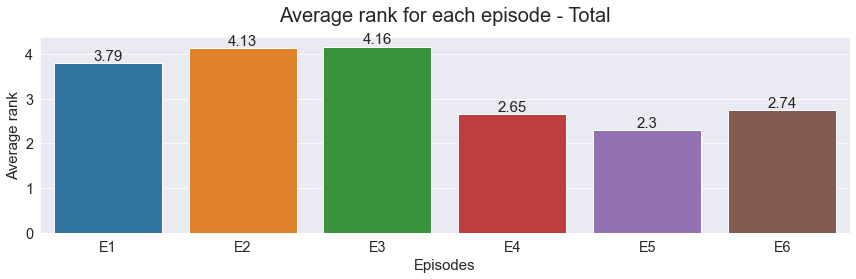

In [87]:
# Plot of the mean for each episode - Total
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']

ax = sns.barplot(x = eps, y = list_ranks)
ax.bar_label(ax.containers[0], fontsize = 15)
plt.title('Average rank for each episode - Total', fontsize = 20, y = 1.05)
plt.xlabel('Episodes', fontsize = 15)
plt.ylabel('Average rank', fontsize = 15)
plt.tight_layout()

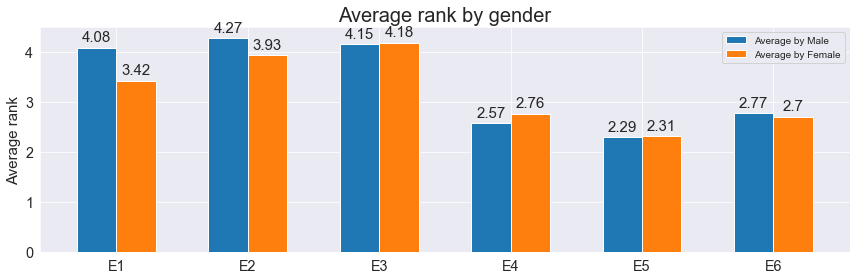

In [88]:
# Plot of the mean for each episode by Gender
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']
male_total = list_ranks_male
female_total = list_ranks_female

plot_bars(list_ranks_male, list_ranks_female, eps, 'Average by Male', 'Average by Female', 
          'Average rank by gender', 'Average rank')

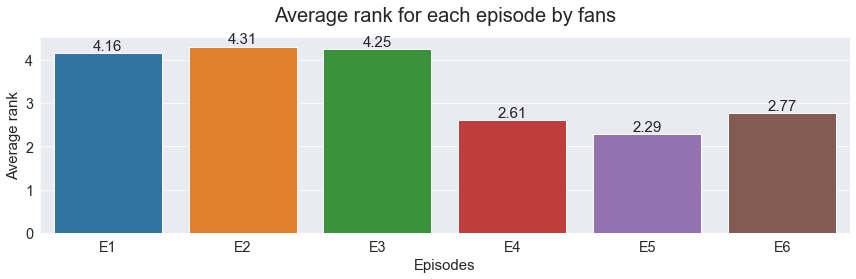

In [89]:
# Plot of the mean by fans for each episode
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']

ax = sns.barplot(x = eps, y = list_ranks_fans)
ax.bar_label(ax.containers[0], fontsize = 15)
plt.title('Average rank for each episode by fans', fontsize = 20, y = 1.05)
plt.xlabel('Episodes', fontsize = 15)
plt.ylabel('Average rank', fontsize = 15)
plt.tight_layout()

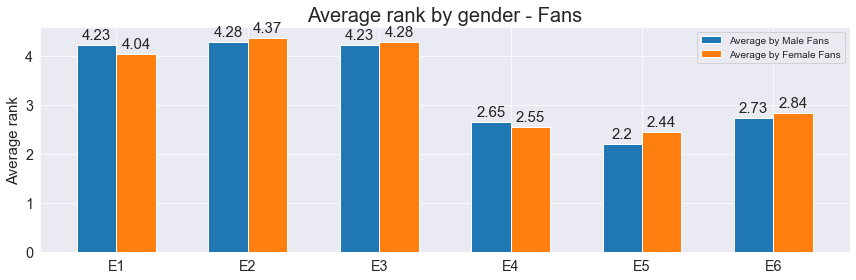

In [90]:
# Plot of the mean for each episode by fans - Gender
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']
male_total_fans = list_ranks_fans_male
female_total_fans = list_ranks_fans_female

plot_bars(list_ranks_fans_male, list_ranks_fans_female, eps, 'Average by Male Fans', 'Average by Female Fans', 
          'Average rank by gender - Fans', 'Average rank')

### Observations
Further investigations of the Fans and Gender columns with regards to the highest-ranked film shows that;

* **"The Empire Strikes Back"** - Episode 5 is the highest ranked film both by Total viewers and Fans

* With regards to the gender, in both Total and Fans categories, male viewers rated **"The Empire Strikes Back"** - Episode 5 higher than female

### Analysis on those who have watched all six films

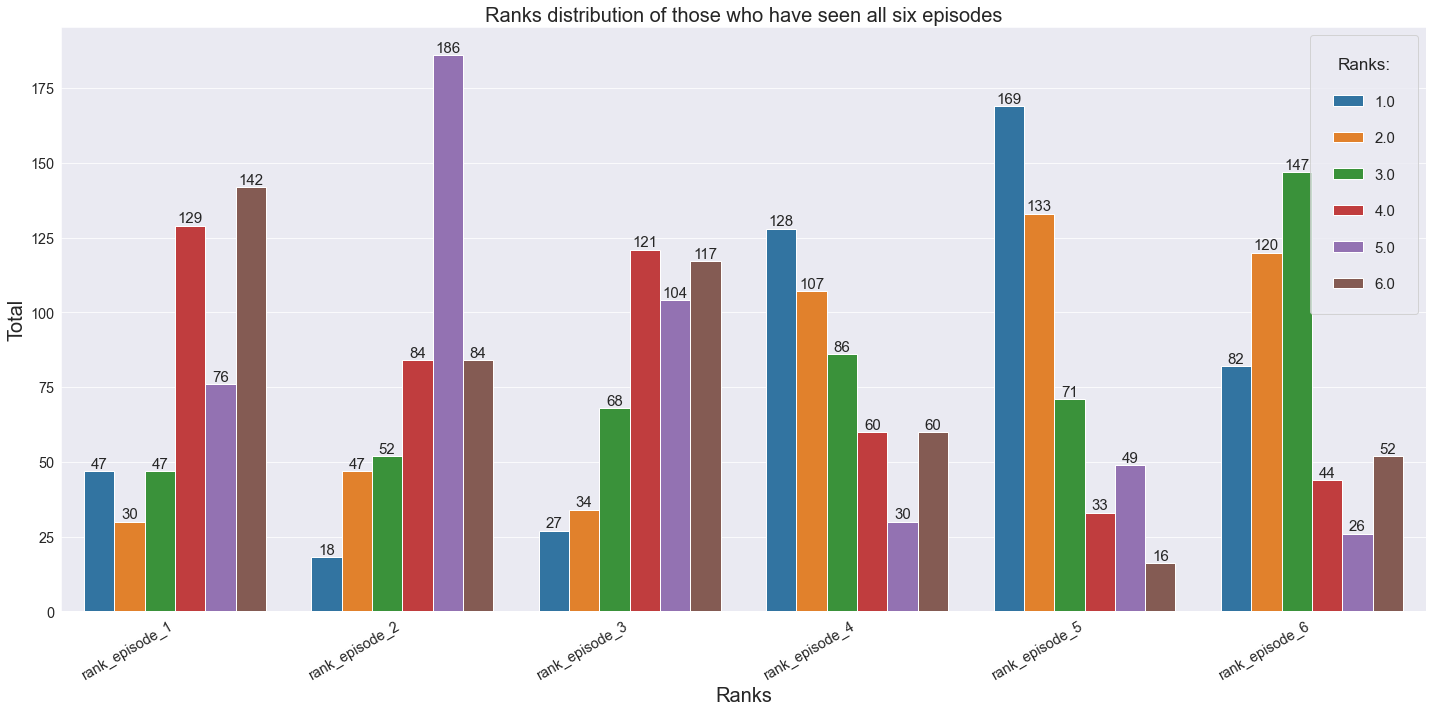

In [91]:
# Ranks distribution
df_test_six = df_seen_six_films.loc[:, 'rank_episode_1':'rank_episode_6']
df1 = df_test_six.melt(var_name = 'Ranks distribution', value_name = 'Ranks')

plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'Ranks distribution', hue = 'Ranks', data = df1)
for container in ax.containers:
    ax.bar_label(container, fontsize = 15)
    
plt.title('Ranks distribution of those who have seen all six episodes', fontsize = 20)
plt.xticks(rotation = 30, ha = 'right')    
plt.xlabel('Ranks', fontsize = 20)
plt.ylabel('Total', fontsize = 20)
plt.legend(loc = 'best', 
        borderpad = 1.5, 
        labelspacing = 1.5, 
        fontsize = 15, 
        title = 'Ranks:',
        title_fontsize = 17)
plt.tight_layout()

In [92]:
# Obtaining the mean of the ranks
six_films_rank = round(df_seen_six_films.loc[:, 'rank_episode_1':'rank_episode_6'].mean(), 2)
six_films_rank_male = round(df_seen_six_films_male.loc[:, 'rank_episode_1':'rank_episode_6'].mean(), 2)
six_films_rank_female = round(df_seen_six_films_female.loc[:, 'rank_episode_1':'rank_episode_6'].mean(), 2)
six_films_rank_fans = round(df_seen_six_films_fans.loc[:, 'rank_episode_1':'rank_episode_6'].mean(), 2)
six_films_rank_male_fans = round(df_seen_six_films_male_fans.loc[:, 'rank_episode_1':'rank_episode_6'].mean(), 2)
six_films_rank_female_fans = round(df_seen_six_films_female_fans.loc[:, 'rank_episode_1':'rank_episode_6'].mean(), 2)

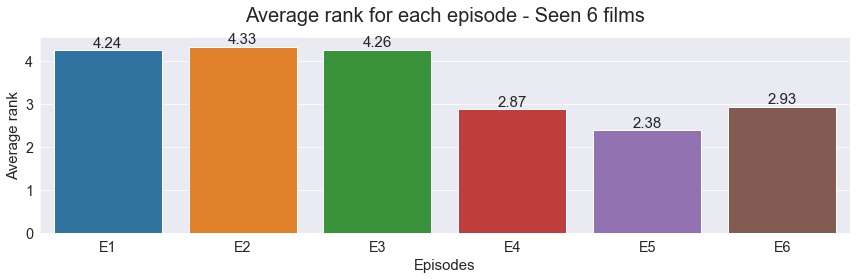

In [93]:
# Plot of the mean for each episode of those who have seen all six of them
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']

ax = sns.barplot(x = eps, y = six_films_rank)
ax.bar_label(ax.containers[0], fontsize = 15)
plt.title('Average rank for each episode - Seen 6 films', fontsize = 20, y = 1.05)
plt.xlabel('Episodes', fontsize = 15)
plt.ylabel('Average rank', fontsize = 15)
plt.tight_layout()

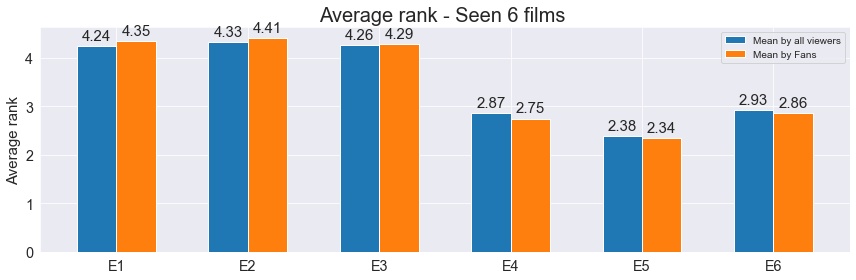

In [94]:
# Plot of the mean for each episode of those who have seen all six of them
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']

plot_bars(six_films_rank, six_films_rank_fans, eps, 'Mean by all viewers', 'Mean by Fans', 
          'Average rank - Seen 6 films ', 'Average rank')

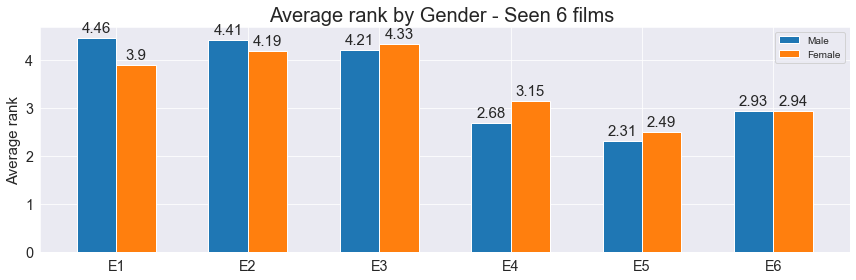

In [95]:
# Plot of the mean for each episode of those who have seen all six of them - Gender
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']

plot_bars(six_films_rank_male, six_films_rank_female, eps, 'Male', 'Female', 
          'Average rank by Gender - Seen 6 films ', 'Average rank')

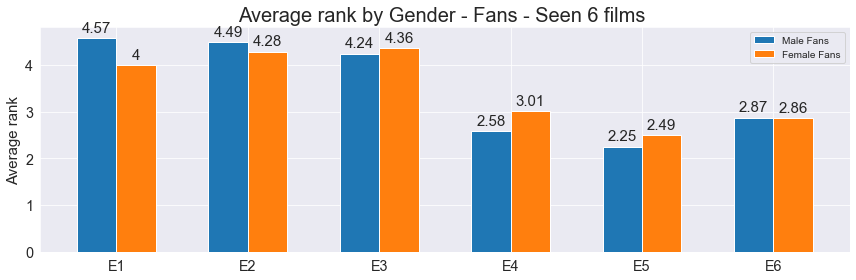

In [96]:
# Plot of the mean for each episode of those who have seen all six of them - Fans - Gender
eps = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']

plot_bars(six_films_rank_male_fans, six_films_rank_female_fans, eps, 'Male Fans', 'Female Fans', 
          'Average rank by Gender - Fans - Seen 6 films ', 'Average rank')

### Observations
Considering the graphics above where the ranks came from all of those who have seen all the six films, it's possible to notice that;

* **"The Empire Strikes Back"** - Episode 5 was once again the favorite film;

* Considering all viewer who have watched the six films, the average rank for **"The Empire Strikes Back"** - Episode 5 was higher considering the Fan viewers;

* In general, male viewers ranked **"The Empire Strikes Back"** - Episode 5 higher than female viewers;

* The most favorite film is **"The Empire Strikes Back"** - Episode 5 and the public who liked it the most is composed by Male Fans (with an average score of 2.25 considering 1 as the favorite and 5 as the least favorite).

# Conclusion

The current project is based on the project by the team at [FiveThirtyEight](https://fivethirtyeight.com/) in determining the best episode of Star Wars franchise. The team hypothesized that **"The Empire Strikes Back"**, Episode 5 of the franchise is the favorite, and verified that hypothesis through a [survey](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) of American Star Wars fans. The episodes are

* **"The Phantom Menace"** - Episode 1
* **"Attack of the Clones"** - Episode 2
* **"Revenge of the Sith"** - Episode 3
* **"A New Hope"** - Episode 4
* **"The Empire Strikes Back"** - Episode 5
* **"Return of the Jedi"** - Episode 6

For our analysis, we used the survey collected by the team. The analysis in this project took 2 approaches:

* A general analysis was made on the entire dataset considering those who've seen at least one film to determine the most watched and the highest-ranked episode. 

* A narrow analysis was made by the segmentation of the dataset by gender and whether the viewer is considered a fan or not.

* For the films ranking, it was considered only those viewers who have seen the respective episode they ranked.

The findings in this current project reveal that;

* Generally, the most watched episode is **"The Empire Strikes Back"**. It is also, the highest ranked episodes amongst all respondents.

* **"The Empire Strikes Back"** is the highest ranked episodes amongst all respondents considering the valid votes. It's also the highest ranked episode of those who consider themselves a fan


* Male viewers (total and fans) ranked **"The Empire Strikes Back"** higher than female viewers.

* The highest score for **"The Empire Strikes Back"** came from male fans.

The findings in this current project are consistent with the hypothesis and [findings](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) of the team at FiveThirtyEight. 